In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Penetración del Servicio de Internet (Nacional)

In [495]:
# Carga del archivo 'Penetracion-totales'
penetracion_hogares = pd.read_excel(r'Dataset\Internet.xlsx', sheet_name='Penetracion-totales')

In [496]:
# Imprimir las primeras 5 filas de "penetración_totales"
penetracion_hogares.head()

Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2024          2                         78.13                     24.57   
1  2024          1                         78.89                     24.79   
2  2023          4                         78.56                     24.66   
3  2023          3                         77.84                     24.41   
4  2023          2                         77.02                     24.14   

         Periodo  
0   Abr-Jun 2024  
1   Ene-Mar 2024  
2   Oct-Dic 2023  
3  Jul-Sept 2023  
4   Abr-Jun 2023

In [497]:
# Imprimir las últimas 5 filas de "penetracion_totales"
penetracion_hogares.tail()

Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
37  2015          1                     51.364586                 15.677234   
38  2014          4                     50.499788                 15.394677   
39  2014          3                     50.672368                 15.428769   
40  2014          2                     49.861428                 15.163908   
41  2014          1                     49.545821                 15.050104   

          Periodo  
37   Ene-Mar 2015  
38   Oct-Dic 2014  
39  Jul-Sept 2014  
40   Abr-Jun 2014  
41   Ene-Mar 2014

In [498]:
# Mostrar la información: número total de columnas, filas, tipos de datos y valores faltantes. 
penetracion_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           42 non-null     int64  
 1   Trimestre                     42 non-null     int64  
 2   Accesos por cada 100 hogares  42 non-null     float64
 3   Accesos por cada 100 hab      42 non-null     float64
 4   Periodo                       42 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB


In [499]:
# Cantidad de filas y columnas 
penetracion_hogares.shape

(42, 5)

In [500]:
# Volver a comprobar si hay valores faltantes
penetracion_hogares.isna().sum()

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

No se encontraron valores nulos y las variables tienen los formatos correctos

In [501]:
# Cantidad de valores únicos por columna
penetracion_hogares.nunique()

Año                             11
Trimestre                        4
Accesos por cada 100 hogares    42
Accesos por cada 100 hab        42
Periodo                         42
dtype: int64

Descripción estadístico 

In [502]:
penetracion_hogares.describe()

Año  Trimestre  Accesos por cada 100 hogares  \
count    42.000000  42.000000                     42.000000   
mean   2018.761905   2.452381                     63.201813   
std       3.074756   1.130560                      9.950321   
min    2014.000000   1.000000                     49.545821   
25%    2016.000000   1.250000                     53.784644   
50%    2019.000000   2.000000                     62.667764   
75%    2021.000000   3.000000                     72.527011   
max    2024.000000   4.000000                     78.890000   

       Accesos por cada 100 hab  
count                 42.000000  
mean                  19.574600  
std                    3.268665  
min                   15.050104  
25%                   16.519507  
50%                   19.395586  
75%                   22.603664  
max                   24.790000

El análisis descriptivo que:
- Promedio: la penetración del servicio de internet es mayor por hogares que por habitantes. El promedio por cada 100 hogares es de 63.20 y el promedio por cada 100 habitantes es de 19.57
- Desviación estándar: hay una mayor desviación estándar en la penetración del servicio de internet por cada 100 hogares, quiere decir, que hay mayor penetración en diferentes zonas geográficas, como también el tipos de viviendas, niveles socioeconómicos, etc. 

La penetración real del servicio de internet en Argentina varía según los diferentes regiones y ciudades, como también el proveedor del servicio. 

In [503]:
# Creación de nueva columna "Fecha" para relacionar las columnas "Año" y "Trimestre"
penetracion_hogares['Fecha'] = pd.PeriodIndex(year = penetracion_hogares['Año'], quarter = penetracion_hogares['Trimestre'], freq= 'Q').to_timestamp()

# El formato de la nueva columna es "datatime64" por lo que no es necesario realizar ninguna conversión adicional

In [504]:
penetracion_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Año                           42 non-null     int64         
 1   Trimestre                     42 non-null     int64         
 2   Accesos por cada 100 hogares  42 non-null     float64       
 3   Accesos por cada 100 hab      42 non-null     float64       
 4   Periodo                       42 non-null     object        
 5   Fecha                         42 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 2.1+ KB


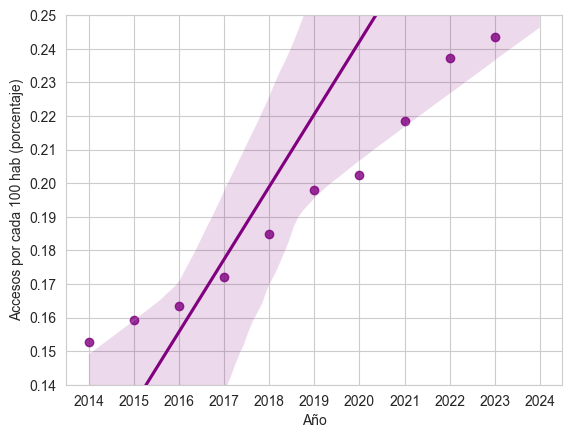

In [505]:
# Crear una copia del DataFrame para evitar modificar el original
df_penetracion_total = penetracion_hogares.copy()

# Convertir los valores de acceso a un porcentaje (si es necesario)
df_penetracion_total[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']] /= 100

# Redondear los valores a 3 decimales
df_penetracion_total = df_penetracion_total.round(3)

# Agrupar por año y calcular la suma de accesos por cada 100 habitantes
df_tendencia = df_penetracion_total.groupby('Año')['Accesos por cada 100 hab'].sum().reset_index()

# Ajustar los valores para los años anteriores a 2024 (dividir entre 4)
# y dejar sin modificar el valor del año 2024
df_tendencia['Accesos por cada 100 hab'] = df_tendencia.apply(
    lambda row: row['Accesos por cada 100 hab'] / 4 if row['Año'] != 2024 else row['Accesos por cada 100 hab'],
    axis=1
)

# Crear el gráfico de regresión
sns.regplot(x='Año', y='Accesos por cada 100 hab', data=df_tendencia, color='purple')

# Personalizar el gráfico
plt.ylim(0.14, 0.24)
plt.xticks(range(2014, 2025))
plt.xlabel("Año")
plt.ylabel("Accesos por cada 100 hab (porcentaje)")
plt.yticks([0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25])
plt.show()

In [506]:
penetracion_hogares.info()

# la columna Trimestre se cambió de formato. 

# Cambiar la columna Trimestre a formato int64
penetracion_hogares['Trimestre'] = penetracion_hogares['Trimestre'].astype('int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Año                           42 non-null     int64         
 1   Trimestre                     42 non-null     int64         
 2   Accesos por cada 100 hogares  42 non-null     float64       
 3   Accesos por cada 100 hab      42 non-null     float64       
 4   Periodo                       42 non-null     object        
 5   Fecha                         42 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 2.1+ KB


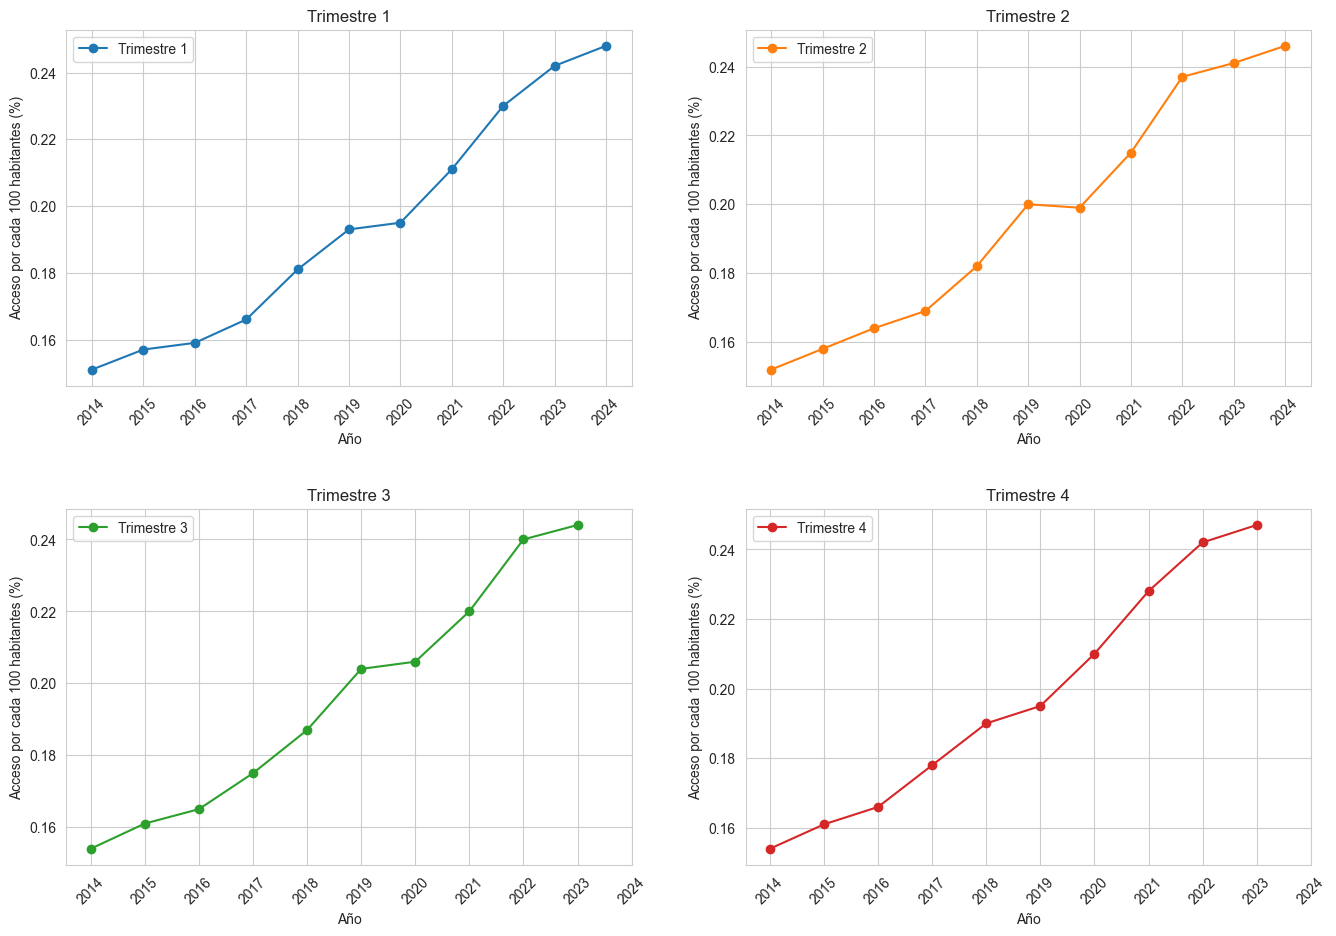

In [507]:
penetracion_totales_comparacion = df_penetracion_total[["Año","Trimestre","Accesos por cada 100 hab"]]

penetracion_t1 = penetracion_totales_comparacion[penetracion_totales_comparacion['Trimestre'] == 1]
penetracion_t2 = penetracion_totales_comparacion[penetracion_totales_comparacion['Trimestre'] == 2]
penetracion_t3 = penetracion_totales_comparacion[penetracion_totales_comparacion['Trimestre'] == 3]
penetracion_t4 = penetracion_totales_comparacion[penetracion_totales_comparacion['Trimestre'] == 4]

# Crear una lista de DataFrames para iterar
dfs = [penetracion_t1, penetracion_t2, penetracion_t3, penetracion_t4]

# Crear subplots 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Colores para las líneas
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Iterar sobre los DataFrames y crear los subplots
for i, df in enumerate(dfs):
    ax = axs[i // 2, i % 2]  # Calcular la posición del subplot
    ax.plot(df['Año'], df['Accesos por cada 100 hab'], 
            marker='o', color=colors[i], label=f'Trimestre {i+1}')
    ax.set_title(f'Trimestre {i+1}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Acceso por cada 100 habitantes (%)')
    ax.set_xticks(range(2014, 2025))
    ax.tick_params(axis='x', rotation=45)
    ax.legend()
    ax.grid(True)

plt.tight_layout(pad=3.0)
plt.show()


El análisis revela un crecimiento constante y sostenido desde el año 2014, con un aumento significativo a partir del año 2017. Los picos más altos se alcanzaron en el año 2023, donde se registró un promedio de 0.24% por cada 100 habitantes. 
La pandemia del COVID-19 actuó como catalizador para este crecimiento, impulsado por el aumento del teletrabajo y la educación en linea, consolidando una tendencia de crecimiento sostenido y constante. 

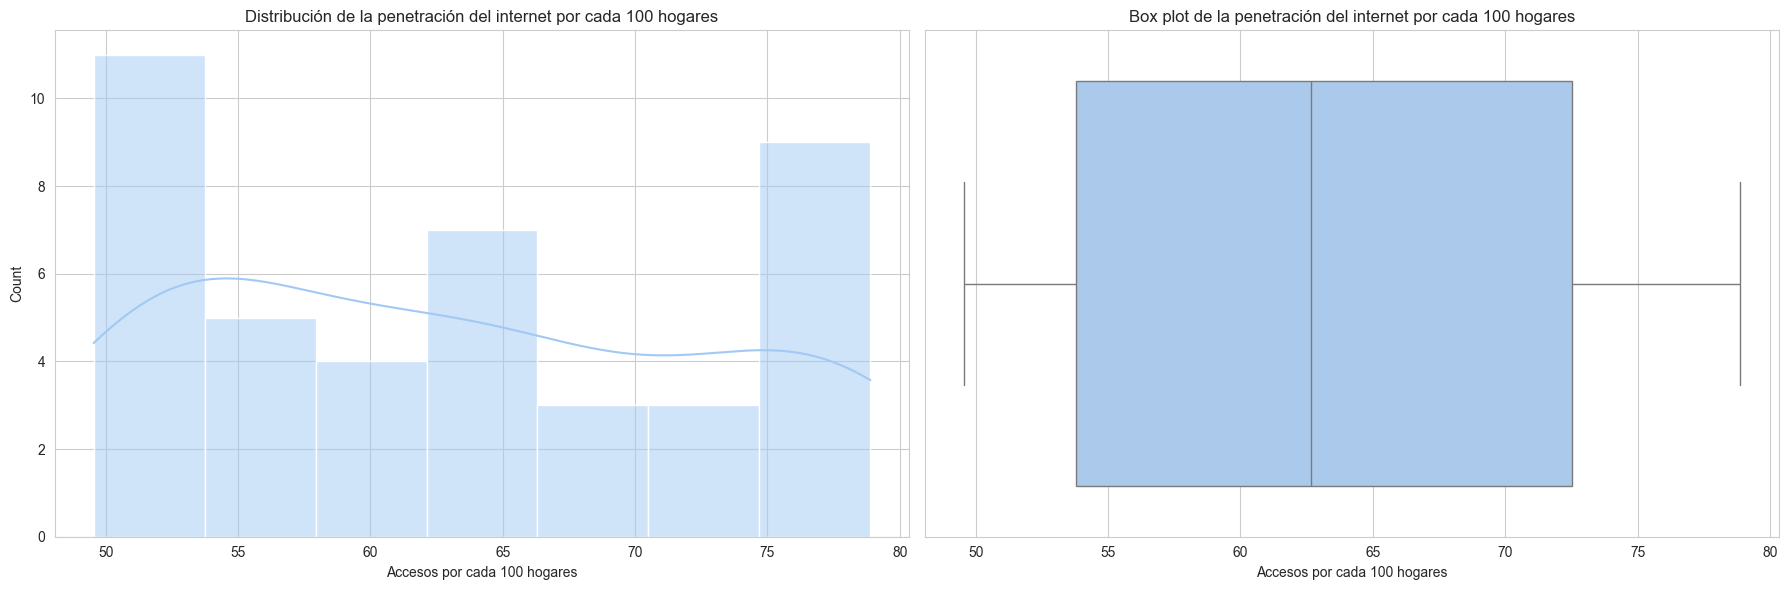

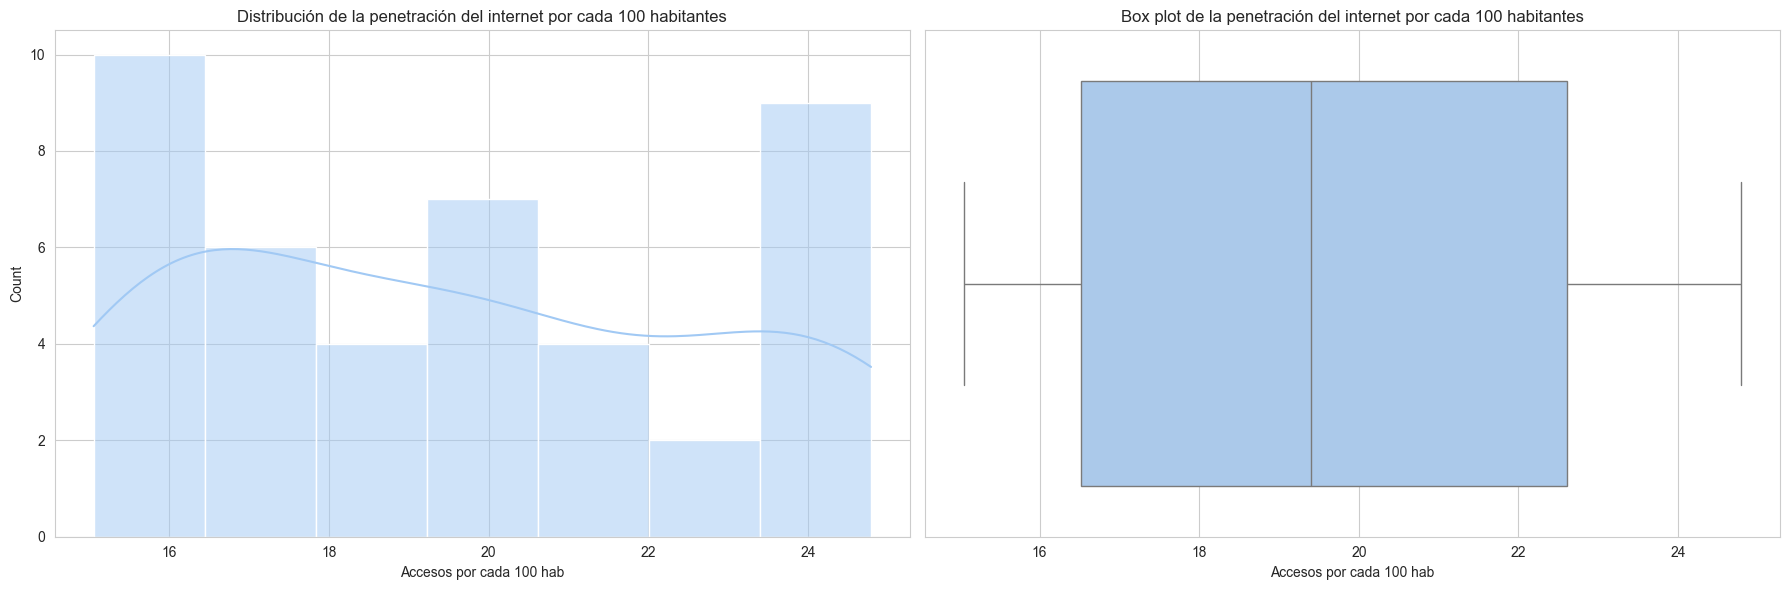

In [508]:
# Comparación entre dos variables en un mismo punto en el tiempo

def plot_distribucion_accesos(df, columna, titulo):
    # Crea un gráfico con histograma y boxplot para visualizar la distribución de una columna.
    # Args: 
        # df (pandas.DataFrame): DataFrame que contiene los datos.
        # columna (str): Nombre de la columna a visualizar.
        # titulo (str): Título del gráfico.

    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Histograma
    sns.histplot(data=df, x=columna, kde=True, ax=axes[0])
    axes[0].set_title(f'Distribución de {titulo}')

    # Boxplot
    sns.boxplot(data=df, x=columna, linewidth=1, ax=axes[1])
    axes[1].set_title(f'Box plot de {titulo}')

    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
plot_distribucion_accesos(penetracion_hogares, 'Accesos por cada 100 hogares', 'la penetración del internet por cada 100 hogares')
plot_distribucion_accesos(penetracion_hogares, 'Accesos por cada 100 hab', 'la penetración del internet por cada 100 habitantes')

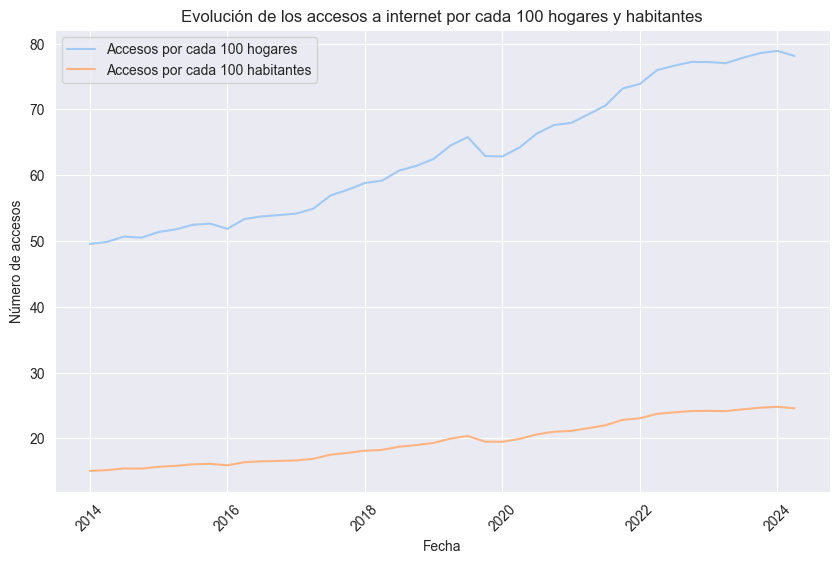

In [509]:
# Variación a través del tiempo

# Configurar el estilo del gráfico
sns.set_style("darkgrid")

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=penetracion_hogares,
            x='Fecha',
            y='Accesos por cada 100 hogares',
            label='Accesos por cada 100 hogares')
sns.lineplot(data=penetracion_hogares,
            x='Fecha',
            y='Accesos por cada 100 hab',
            label='Accesos por cada 100 habitantes')

# Personalizar el gráfico
plt.xlabel('Fecha')
plt.ylabel('Número de accesos')
plt.title('Evolución de los accesos a internet por cada 100 hogares y habitantes')
plt.xticks(rotation=45)
plt.legend()

# Mostrar el gráfico
plt.show()

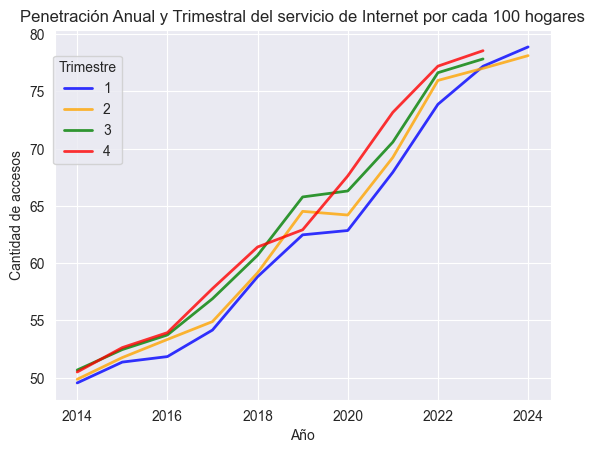

In [510]:
# Establecer el orden de los trimestres
penetracion_hogares['Trimestre'] = pd.Categorical(penetracion_hogares['Trimestre'], categories=[1, 2, 3, 4], ordered=True)

# Definir una paleta de colores personalizada
colores = ['blue', 'orange', 'green', 'red']

# Crear el gráfico de líneas de la penetración del servicio de internet por Año y por Trimestre
for i, trimestre in enumerate(penetracion_hogares['Trimestre'].cat.categories):
    data_trimestre = penetracion_hogares[penetracion_hogares['Trimestre'] == trimestre]
    plt.plot(data_trimestre['Año'], data_trimestre['Accesos por cada 100 hogares'], 
            label=trimestre, color=colores[i], linewidth=2, alpha=0.8)

# Agregar etiquetas y leyenda
plt.title('Penetración Anual y Trimestral del servicio de Internet por cada 100 hogares')
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')
plt.legend(title='Trimestre', loc='upper right', bbox_to_anchor=(0.15, 0.95))

# Mostrar el gráfico completo
plt.grid(True)  # Agrega cuadrícula para una mejor legibilidad
plt.show()

Se puede apreciar que, en el actual año (2024), hubo una mayor penetración en el primer trimestre comparado con años anteriores. (Esto puede cambiar debido a que falta los últimos trimestres del año 2024).

In [511]:
# Guardar el dataframe en un archivo formato csv
penetracion_hogares.to_csv('penetracion_internet.csv', sep = ',', index = False)

## Penetración de Internet por provincia

Acceso al servicio de internet por cada 100 hogares por provincia

In [512]:
# Carga del archivo 'Penetracion-hogares'
penetracion_provincia= pd.read_excel(r'Dataset\Internet.xlsx', sheet_name='Penetración-poblacion')

In [513]:
# Carga del archivo y creación del dataframe
penetracion_provincia.head()

Año  Trimestre        Provincia  Accesos por cada 100 hab
0  2024          2     Buenos Aires                     27.43
1  2024          2  Capital Federal                     47.44
2  2024          2        Catamarca                     17.50
3  2024          2            Chaco                     11.78
4  2024          2           Chubut                     26.46

In [514]:
# Mostrar detalle sobre el número de columnas, filas, tipos de datos y valores nulos
penetracion_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       1000 non-null   int64  
 1   Trimestre                 1000 non-null   int64  
 2   Provincia                 1000 non-null   object 
 3   Accesos por cada 100 hab  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [515]:
# Verificar si no hay valores nulos
penetracion_provincia.isna().sum()

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

In [516]:
# Total de valores únicos por columnas
penetracion_provincia.nunique()

Año                          11
Trimestre                     4
Provincia                    24
Accesos por cada 100 hab    990
dtype: int64

In [517]:
# Redondear la columna "Accesos por cada 100 hab"
penetracion_provincia[["Accesos por cada 100 hab"]] = penetracion_provincia[["Accesos por cada 100 hab"]].round(2)

In [518]:
# Modificaciones de los nombres de las provincias
penetracion_provincia['Provincia'] = penetracion_provincia['Provincia'].str.replace('Santiago Del', 'Santiago del')
penetracion_provincia['Provincia'] = penetracion_provincia['Provincia'].str.replace('Tierra Del', 'Tierra del')

penetracion_provincia['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucumán'],
      dtype=object)

Distribución de los datos por provincia por cada 100 habitantes. 

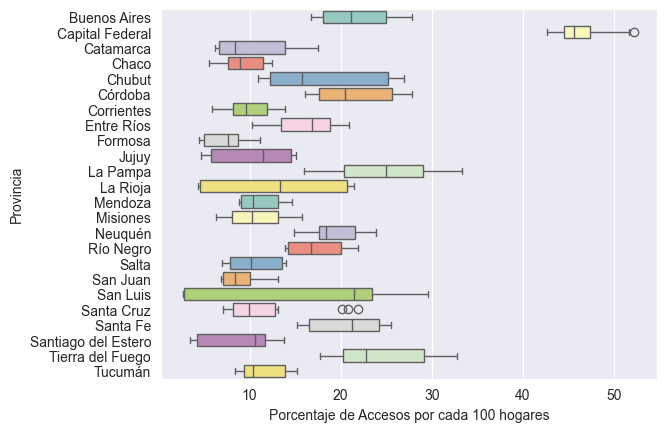

In [519]:
# Creación de diagrama de caja 
sns.boxplot(data=penetracion_provincia, x="Accesos por cada 100 hab", y="Provincia", hue = "Provincia",palette="Set3")
# Etiqueta eje X
plt.xlabel("Porcentaje de Accesos por cada 100 hogares")
# Visivilizar el gráfico
plt.show()

Los datos presentados muestran que el mayor porcentaje se encuentra en la Capital Federal, estos datos atípicos se analizaran a continuación:  

In [520]:
penetracion_provincia[penetracion_provincia['Provincia'] == 'Capital Federal']

Año  Trimestre        Provincia  Accesos por cada 100 hab
1    2024          2  Capital Federal                     47.44
25   2024          1  Capital Federal                     48.78
49   2023          4  Capital Federal                     47.80
73   2023          3  Capital Federal                     47.60
97   2023          2  Capital Federal                     47.27
121  2023          1  Capital Federal                     50.23
145  2022          4  Capital Federal                     50.35
169  2022          3  Capital Federal                     50.22
193  2022          2  Capital Federal                     49.87
217  2022          1  Capital Federal                     46.01
241  2021          4  Capital Federal                     45.85
265  2021          3  Capital Federal                     45.90
289  2021          2  Capital Federal                     45.49
313  2021          1  Capital Federal                     44.83
337  2020          4  Capital Federal                     44.83
361  2020          3  Capital Federal                     44.62
385  2020          2  Capital Federal                     44.15
409  2020          1  Capital Federal                     44.02
433  2019          4  Capital Federal                     44.19
457  2019          3  Capital Federal                     46.90
481  2019          2  Capital Federal                     46.09
505  2019          1  Capital Federal                     45.58
529  2018          4  Capital Federal                     45.25
553  2018          3  Capital Federal                     45.38
577  2018          2  Capital Federal                     44.63
601  2018          1  Capital Federal                     44.56
625  2017          4  Capital Federal                     51.62
649  2017          3  Capital Federal                     51.24
673  2017          2  Capital Federal                     52.24
697  2017          1  Capital Federal                     45.69
721  2016          4  Capital Federal                     45.78
745  2016          3  Capital Federal                     45.85
769  2016          2  Capital Federal                     45.59
793  2016          1  Capital Federal                     43.76
817  2015          4  Capital Federal                     44.83
841  2015          3  Capital Federal                     44.91
865  2015          2  Capital Federal                     44.08
889  2015          1  Capital Federal                     43.66
913  2014          4  Capital Federal                     43.60
937  2014          3  Capital Federal                     43.21
961  2014          2  Capital Federal                     42.97
985  2014          1  Capital Federal                     42.66

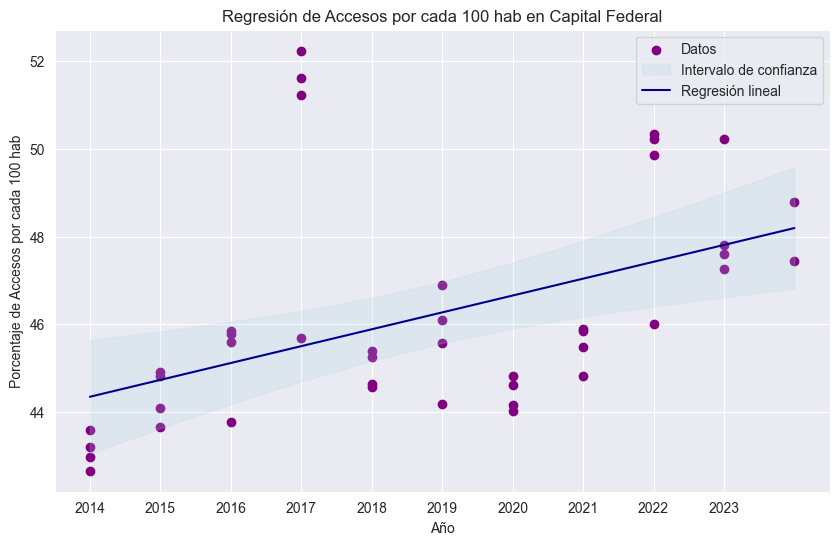

In [521]:
import statsmodels.api as sm

# Filtrar datos para la provincia de "Capital Federal"
data_capital = penetracion_provincia[penetracion_provincia["Provincia"] == "Capital Federal"]

# Obtener los valores de X (Año) e Y (Accesos por cada 100 hab)
x = data_capital['Año']
y = data_capital['Accesos por cada 100 hab']

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
plt.scatter(x, y, color='purple', label='Datos')

# Calcular la regresión lineal con statsmodels
X = sm.add_constant(x)  # Agregar una columna de unos para la intersección
model = sm.OLS(y, X).fit()

# Obtener las predicciones y los intervalos de confianza
predictions = model.get_prediction()
ci = predictions.conf_int()

# Graficar los intervalos de confianza
plt.fill_between(x, ci[:, 0], ci[:, 1], alpha=0.2, color='lightblue', label='Intervalo de confianza')

# Graficar la línea de regresión
plt.plot(x, model.fittedvalues, color='darkblue', label='Regresión lineal')

# Establecer el rango de los ticks en el eje x
plt.xticks(range(2014, 2024))

# Etiquetas para los ejes y título
plt.xlabel('Año')
plt.ylabel('Porcentaje de Accesos por cada 100 hab')
plt.title('Regresión de Accesos por cada 100 hab en Capital Federal')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

En los años 2017, 2022 y 2023 los datos están por encima de la curva. 

In [522]:
# Filtrar los datos para obtener información de la Capital Federal en el año 2017
penetracion_provincia.query('Provincia == "Capital Federal" and Año == 2017')

Año  Trimestre        Provincia  Accesos por cada 100 hab
625  2017          4  Capital Federal                     51.62
649  2017          3  Capital Federal                     51.24
673  2017          2  Capital Federal                     52.24
697  2017          1  Capital Federal                     45.69

In [523]:
# Filtrar los datos para obtener información de la Capital Federal en el año 2022
penetracion_provincia.query('Provincia == "Capital Federal" and Año == 2022')

Año  Trimestre        Provincia  Accesos por cada 100 hab
145  2022          4  Capital Federal                     50.35
169  2022          3  Capital Federal                     50.22
193  2022          2  Capital Federal                     49.87
217  2022          1  Capital Federal                     46.01

In [524]:
# Filtrar los datos para obtener información de la Capital Federal en el año 2023
penetracion_provincia.query('Provincia == "Capital Federal" and Año == 2023')

Año  Trimestre        Provincia  Accesos por cada 100 hab
49   2023          4  Capital Federal                     47.80
73   2023          3  Capital Federal                     47.60
97   2023          2  Capital Federal                     47.27
121  2023          1  Capital Federal                     50.23

El análisis de la penetración del servicio de internet en la Capital Federal, revela un patrón de crecimiento en e número de accesos por cada 100 habitantes a lo largo de los años analizados. Esta tendencia ascendente no es uniforme, se observa fluctuaciones considerables de un año a otro. 

Los picos registrados en los años 2017, 2022 y 2023 evidencian momentos de mayor dinamisma en la adquisición de servicios de internet. A medida que se avanza en el tiempo, la incertidumbre sobre la continuidad de esta tendencia se incrementa, como se refleja en el ensanchamiento del intervalo de confianza. 

In [525]:
# Análisis estadístico 
penetracion_provincia.describe()

Año    Trimestre  Accesos por cada 100 hab
count  1000.000000  1000.000000               1000.000000
mean   2018.800000     2.464000                 15.727140
std       3.021445     1.114426                  9.240134
min    2014.000000     1.000000                  2.720000
25%    2016.000000     1.000000                  9.020000
50%    2019.000000     2.000000                 13.675000
75%    2021.000000     3.000000                 20.325000
max    2024.000000     4.000000                 52.240000

Conclusion: 
- Media y desviación estándar: la penetración promedio de internet en Argentina durante el período analizado es de 15.73 accesos por cada 100 hogares, con una variabilidad considerable reflejada en una desviación estándar de 9.24. Esta disparidad indica una marcada desigualdad en el acceso a internet entre las diferentes provincias. 
- Valores extremos: si bien el valor máximo de accesos por cada 100 hogares supera los 52 en el año 2024, el mínimo se coloca en apenas 2.72 en el 2014, evidenciando una brecha significativa en la conectividad a nivel nacional. 
La información proporcionada sugiere que el acceso a internet en Argentina ha experimentado un crecimiento significativo en el periodo de 10 años. 

In [526]:
# Carga del archivo 'Penetracion-hogares'
penetracion_por_provincia= pd.read_excel(r'Dataset\Internet.xlsx', sheet_name='Penetracion-hogares')

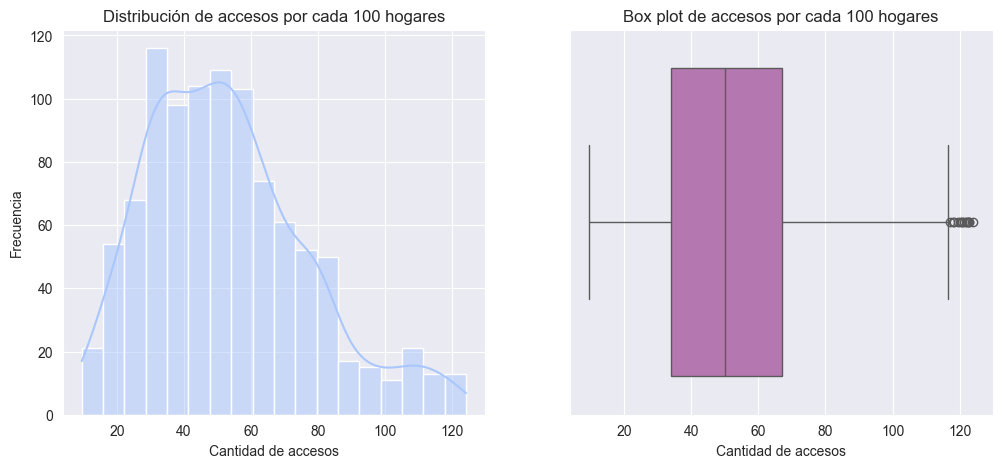

In [527]:
# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Obtener una paleta de colores
colors = sns.color_palette('coolwarm', 2) # Paleta de 2 colores fríos - cálidos

# Histograma en el primer subplot
sns.histplot(data= penetracion_por_provincia, x='Accesos por cada 100 hogares',
            kde=True, color=colors[0], ax=axes[0])
axes[0].set_title('Distribución de accesos por cada 100 hogares')
axes[0].set_xlabel('Cantidad de accesos')
axes[0].set_ylabel('Frecuencia')

# Box plot en el segundo subplot
sns.boxplot(data= penetracion_por_provincia, x='Accesos por cada 100 hogares', color='#BE6DB7',
            linewidth=1, ax=axes[1])
axes[1].set_title('Box plot de accesos por cada 100 hogares')
axes[1].set_xlabel('Cantidad de accesos')

plt.show()

La distribución de la variable "Acceso por cada 100 hab" presenta una clara asimetría positiva, la mayoría de las provincias tienen una baja penetración de internet. La presencia de una cola derecha indica la existencia de regiones con un nivel de acceso significativamente mayor.

El box plot revela una clara desigualdad en la distribución de los accesos a internet, con algunos valores atípicos correspondientes a provincias con una penetración significativamente mayor. La mayoría de las provincias se concentran en un rango de valores más bajos, lo que indica una brecha digital.

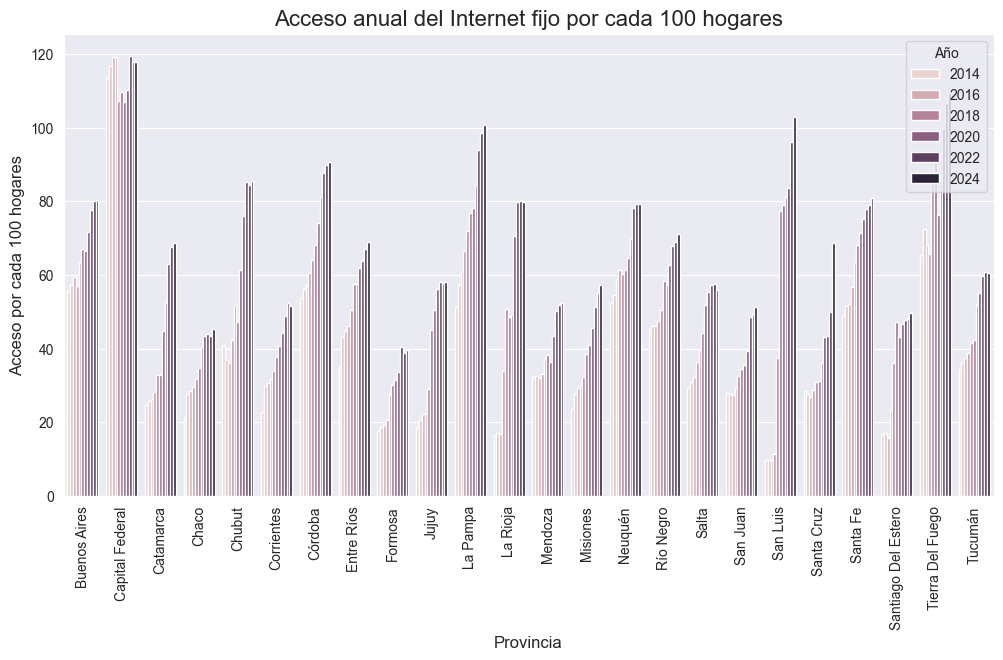

In [528]:
# Agrupar datos por provincia y año para calcular la media. 
df_resumen = penetracion_por_provincia.groupby(['Provincia', 'Año'])['Accesos por cada 100 hogares'].mean().reset_index()

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Provincia', y='Accesos por cada 100 hogares', hue='Año', data=df_resumen, ax=ax)

# Personalizar el gráfico
ax.set_title('Acceso anual del Internet fijo por cada 100 hogares', fontsize=16)
ax.set_xlabel('Provincia', fontsize=12)
ax.set_ylabel('Acceso por cada 100 hogares', fontsize=12)
ax.tick_params(axis='x', rotation=90)
ax.legend(title='Año', loc='upper right')  # Ajustar la posición de la leyenda

plt.show()

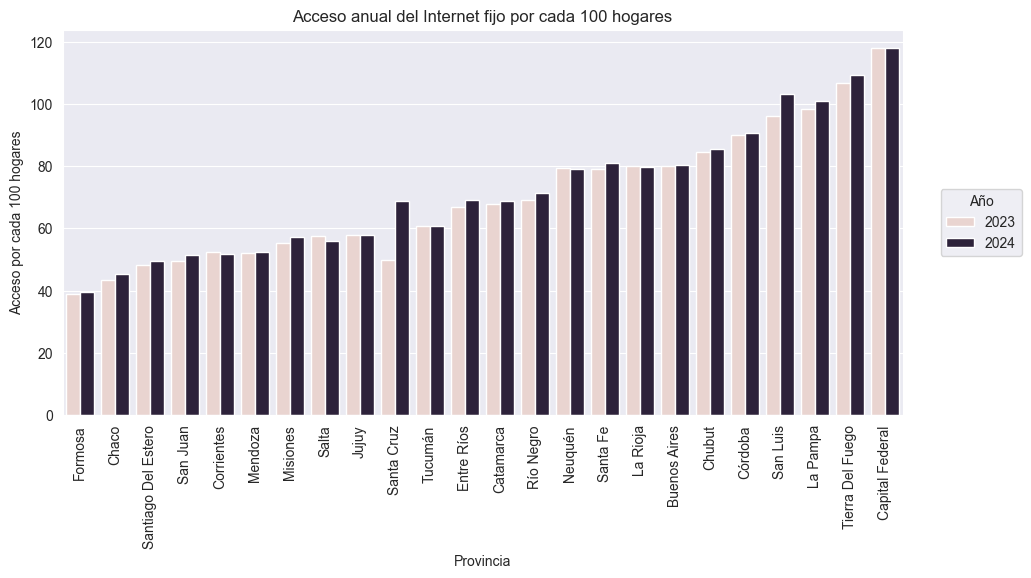

In [529]:
# Filtrar los datos para incluir solo los años 2023 y 2024
df_resumen_filtrado = df_resumen[df_resumen['Año'].isin([2023, 2024])]

# Obtener el orden de las provincias basado en la media de acceso por cada 100 hogares
provincias_ordenadas = df_resumen_filtrado.groupby('Provincia')['Accesos por cada 100 hogares'].mean().sort_values().index

# Generar el gráfico de barras agrupadas con Seaborn
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='Provincia', y='Accesos por cada 100 hogares', hue='Año', data=df_resumen_filtrado, ax=ax, order=provincias_ordenadas)

# Actualizar las opciones del diseño del gráfico
ax.set_title('Acceso anual del Internet fijo por cada 100 hogares')
ax.set_xlabel('Provincia')
ax.set_ylabel('Acceso por cada 100 hogares')
ax.tick_params(axis='x', rotation=90)

# Agregar título a la leyenda
ax.legend(title='Año', ncol=1, bbox_to_anchor=(1.15, 0.5), loc='center right')
# Ajustar el espacio entre el gráfico y la leyenda
plt.subplots_adjust(left=0.2)

# Mostrar el gráfico
plt.show()

En los últimos 2 años (2023 y 2024, considerando que sólo hay datos de los primeros dos trimestres del año 2024) la Capital Federal, Tierra del Fuego y San Luis superaron el 100% en la penetración de cada hogar. 

Las provincias como Formosa, Chaco y Santiago del Estero tienen una penetración del servicio de Internet menor que el promedio. 

Esta puede ser una buena oportunidad para acceder en estas áreas que tienen menos accesibilidad a internet y reducir la brecha digital. 

In [530]:
penetracion_por_provincia.to_csv('penetracion_prov.csv', sep = ',', index = False, encoding = 'ISO 8859-1')

## Accesos por tecnología



In [531]:
# Carga del archivo 'Accesos Por Tecnología'
acceso_tecnologia= pd.read_excel(r'Dataset\Internet.xlsx', sheet_name='Accesos Por Tecnología')

In [532]:
# Imprimir las primeras 5 filas 
acceso_tecnologia.head()

Año Trimestre        Provincia      ADSL  Cablemodem  Fibra óptica  \
0  2024         2     Buenos Aires  214055.0   2722466.0     1849476.0   
1  2024         2  Capital Federal   54102.0   1144781.0      230402.0   
2  2024         2        Catamarca    4951.0     10303.0       58355.0   
3  2024         2            Chaco    9448.0     57935.0       68944.0   
4  2024         2           Chubut   25955.0     80704.0       26516.0   

   Wireless    Otros      Total  
0  138638.0  64745.0  4989380.0  
1    4493.0  29821.0  1463599.0  
2    1384.0     81.0    75074.0  
3    8407.0   2358.0   147092.0  
4   31118.0   9930.0   174223.0

In [533]:
acceso_tecnologia['Año'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, '2019 *', 2018, 2017, 2016,
       2015, 2014, nan, '*'], dtype=object)

In [534]:
# Información (número de columnas, filas, tipos de datos y valores faltantes)
acceso_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1008 non-null   object 
 1   Trimestre     1008 non-null   object 
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), object(3)
memory usage: 71.1+ KB


In [535]:
import re

def limpiar_columna_ano(df, formato_ano='^\d+$'):
    # Función para limpiar la columna 'Año', adaptando la expresión regular según el formato
    def limpiar_valor(valor):
        if re.match(formato_ano, str(valor)):
            return int(valor)
        else:
            return np.nan

    df['Año'] = df['Año'].apply(limpiar_valor)
    df = df.dropna(subset=['Año'])
    return df

# Aplicar la función con un formato de año específico (si es necesario)
acceso_tecnologia_limpio = limpiar_columna_ano(acceso_tecnologia, formato_ano='^\d{4}$')  # Solo años de 4 dígitos

In [536]:
acceso_tecnologia_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 935 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           935 non-null    float64
 1   Trimestre     935 non-null    object 
 2   Provincia     935 non-null    object 
 3   ADSL          935 non-null    float64
 4   Cablemodem    935 non-null    float64
 5   Fibra óptica  935 non-null    float64
 6   Wireless      935 non-null    float64
 7   Otros         935 non-null    float64
 8   Total         935 non-null    float64
dtypes: float64(7), object(2)
memory usage: 73.0+ KB


In [537]:
acceso_tecnologia_limpio['Año'].unique()

array([2024., 2023., 2022., 2021., 2020., 2019., 2018., 2017., 2016.,
       2015., 2014.])

In [538]:
# Mostrar un resumen estadístico de las columnas numériocas de "acceso_internet_tecnologia"
acceso_tecnologia.describe()

Año          ADSL    Cablemodem  Fibra óptica       Wireless  \
count   935.000000  1.007000e+03  1.007000e+03  1.007000e+03    1007.000000   
mean   2018.737968  1.129309e+05  1.821583e+05  4.855699e+04   12542.229394   
std       3.150542  2.362922e+05  4.460058e+05  1.758694e+05   20909.412762   
min    2014.000000  2.230000e+03  0.000000e+00  0.000000e+00       0.000000   
25%    2016.000000  1.978950e+04  1.102050e+04  3.540000e+02     813.000000   
50%    2018.000000  4.396700e+04  4.075000e+04  3.015000e+03    5224.000000   
75%    2022.000000  8.722000e+04  7.678350e+04  2.925700e+04   14367.500000   
max    2024.000000  1.586343e+06  2.797700e+06  1.849476e+06  138638.000000   

              Otros         Total  
count   1007.000000  1.007000e+03  
mean    6497.041708  3.626854e+05  
std    11239.855091  7.773137e+05  
min        2.000000  1.255700e+04  
25%      334.500000  6.241150e+04  
50%     1920.000000  1.139150e+05  
75%     7548.000000  1.956520e+05  
max    73415.000000  5.011620e+06

In [539]:
# Agrupar por provincia, año y trimestre para obtener la suma de accesos totales
accesos_por_trimestre = acceso_tecnologia_limpio.groupby(['Provincia', 'Año', 'Trimestre'])['Total'].sum().reset_index()

# Ordenar por año y trimestre descendentemente
accesos_por_trimestre = accesos_por_trimestre.sort_values(['Año', 'Trimestre'], ascending=False)

# Obtener el primer registro de cada grupo (que corresponde al último trimestre)
ultimo_trimestre = accesos_por_trimestre.groupby('Provincia').first().reset_index()

# Calcular el acceso proyectado y el KPI de incremento porcentual
ultimo_trimestre['Nuevo Acceso'] = ultimo_trimestre['Total'] * 1.02
ultimo_trimestre['KPI Incremento (%)'] = ((ultimo_trimestre['Nuevo Acceso'] - ultimo_trimestre['Total']) / ultimo_trimestre['Total']) * 100

# Mostrar los primeros 5 resultados
print(ultimo_trimestre[['Provincia', 'Total', 'Nuevo Acceso', 'KPI Incremento (%)']].head())

         Provincia      Total  Nuevo Acceso  KPI Incremento (%)
0     Buenos Aires  4989380.0    5089167.60                 2.0
1  Capital Federal  1463599.0    1492870.98                 2.0
2        Catamarca    75074.0      76575.48                 2.0
3            Chaco   147092.0     150033.84                 2.0
4           Chubut   174223.0     177707.46                 2.0


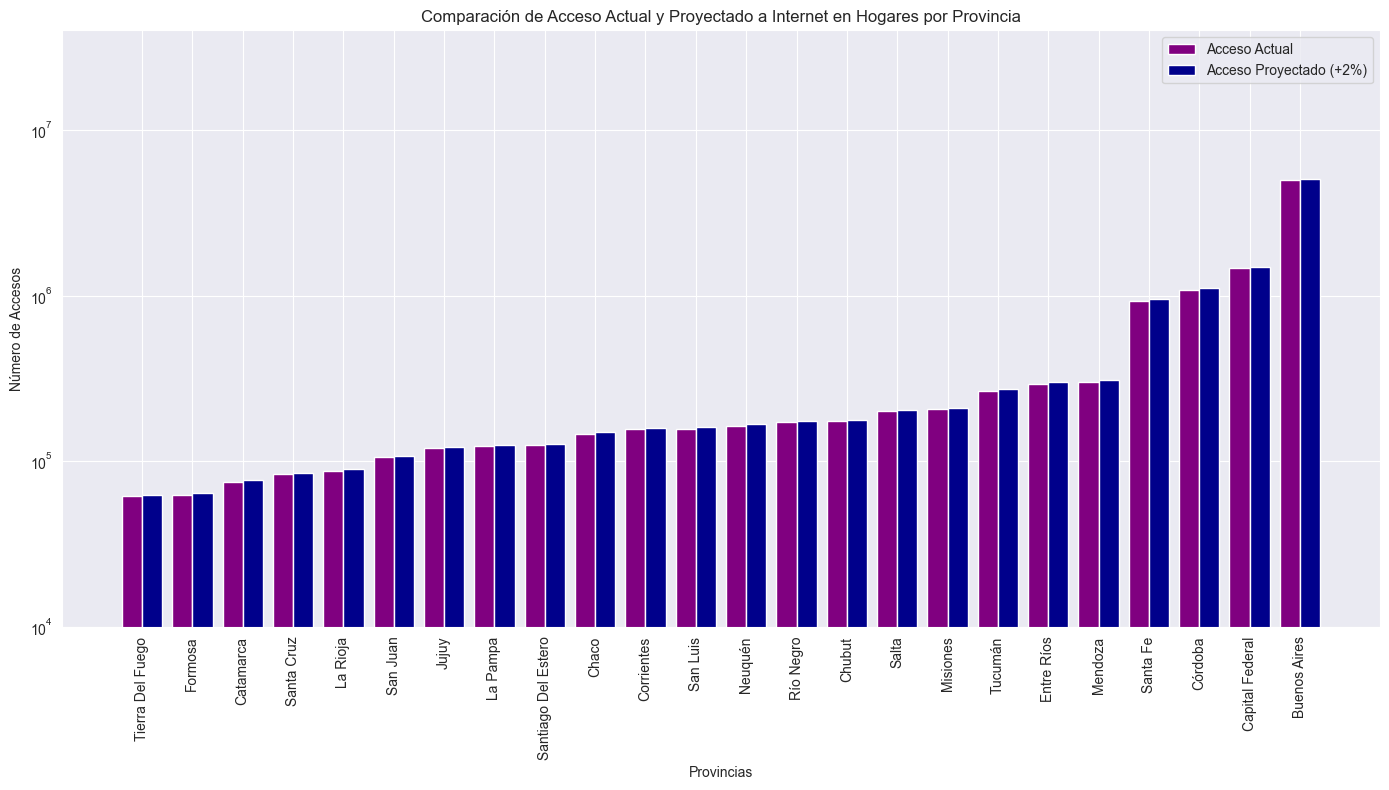

In [540]:
# Ordenar el DataFrame por el número de accesos actuales de menor a mayor
accesos_ultimo_trimestre_sorted = ultimo_trimestre.sort_values(by='Total')

# Gráfico de barras para comparar Acceso Actual y Proyectado con ajustes de escala
plt.figure(figsize=(14, 8))
x = np.arange(len(accesos_ultimo_trimestre_sorted['Provincia']))

plt.bar(x - 0.2, accesos_ultimo_trimestre_sorted['Total'], width=0.4, color='purple', label='Acceso Actual')
plt.bar(x + 0.2, accesos_ultimo_trimestre_sorted['Nuevo Acceso'], width=0.4, color='darkblue', label='Acceso Proyectado (+2%)')

# Escala logarítmica en el eje Y
plt.yscale('log')

# Ajustes de límites en el eje Y (opcional)
plt.ylim(1e4, 4e7)

# Etiquetas y título
plt.xlabel('Provincias')
plt.ylabel('Número de Accesos')
plt.title('Comparación de Acceso Actual y Proyectado a Internet en Hogares por Provincia')
plt.xticks(x, accesos_ultimo_trimestre_sorted['Provincia'], rotation=90)
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [541]:
# Modificar algunos nombres de las provincias para mantener la uniformidad con los demás Dataframes
acceso_tecnologia_limpio['Provincia'] = acceso_tecnologia_limpio['Provincia'].str.replace('Santiago Del', 'Santiago del')
acceso_tecnologia_limpio['Provincia'] = acceso_tecnologia_limpio['Provincia'].str.replace('Tierra Del', 'Tierra del')
# Verificar que los cambios se aplicaron correctamente
acceso_tecnologia_limpio['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucumán'],
      dtype=object)

In [542]:
acceso_tecnologia_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 935 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           935 non-null    float64
 1   Trimestre     935 non-null    object 
 2   Provincia     935 non-null    object 
 3   ADSL          935 non-null    float64
 4   Cablemodem    935 non-null    float64
 5   Fibra óptica  935 non-null    float64
 6   Wireless      935 non-null    float64
 7   Otros         935 non-null    float64
 8   Total         935 non-null    float64
dtypes: float64(7), object(2)
memory usage: 73.0+ KB


In [543]:
# Convertir la columna "Año" a numérica
acceso_tecnologia_limpio['Año'] = acceso_tecnologia_limpio['Año'].replace('[^0-9]', '', regex=True).astype(int)
# Convertir la columna "Trimestre" a numérica
acceso_tecnologia_limpio['Trimestre'] = acceso_tecnologia_limpio['Trimestre'].replace('[^0-9]', '',
                                                                                            regex=True).astype(int)
# Convertir la columna "ADSL" a numérica
acceso_tecnologia_limpio['ADSL'] = acceso_tecnologia_limpio['ADSL'].replace('[^0-9]', '', regex=True).astype(int)
# Convertir la columna "Cablemodem" a numérica
acceso_tecnologia_limpio['Cablemodem'] = acceso_tecnologia_limpio['Cablemodem'].replace('[^0-9]', '',
                                                                                              regex=True).astype(int)
# Convertir la columna "Fibra óptica" a numérica
acceso_tecnologia_limpio['Fibra óptica'] = acceso_tecnologia_limpio['Fibra óptica'].replace('[^0-9]', '',
                                                                                                  regex=True).astype(int)
# Convertir la columna "Total" a numérica
acceso_tecnologia_limpio['Total'] = acceso_tecnologia_limpio['Total'].replace('[^0-9]', '', regex=True).astype(int)

In [544]:
acceso_tecnologia_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 935 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           935 non-null    int32  
 1   Trimestre     935 non-null    int32  
 2   Provincia     935 non-null    object 
 3   ADSL          935 non-null    int32  
 4   Cablemodem    935 non-null    int32  
 5   Fibra óptica  935 non-null    int32  
 6   Wireless      935 non-null    float64
 7   Otros         935 non-null    float64
 8   Total         935 non-null    int32  
dtypes: float64(2), int32(6), object(1)
memory usage: 51.1+ KB


In [545]:
# Convertir la columna "Wireless" a tipo de dato int
acceso_tecnologia_limpio['Wireless'] = (acceso_tecnologia_limpio['Wireless'] * 1000).astype(int)
# Convertir la columna "Otros" a tipo de dato int
acceso_tecnologia_limpio['Otros'] = (acceso_tecnologia_limpio['Otros'] * 1000).astype(int)

In [546]:
# Veificar que los cambios se aplicaron correctamente
acceso_tecnologia_limpio.head(1)

Año  Trimestre     Provincia    ADSL  Cablemodem  Fibra óptica   Wireless  \
0  2024          2  Buenos Aires  214055     2722466       1849476  138638000   

      Otros    Total  
0  64745000  4989380

In [547]:
# Tecnología más utilizada

# Calcular la suma total de accesos a cada tipo de tecnología
sumas_por_tecnologia = acceso_tecnologia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Obtener el nombre de la columna con la suma total más alta
tecnologia_mas_utilizada = sumas_por_tecnologia.idxmax()

# Imprimir el resultado
print(f"La tecnología más utilizada es: {tecnologia_mas_utilizada}")

La tecnología más utilizada es: Cablemodem


#### Accesos promedios anules-trimestrales a las tecnologías por regiones


In [548]:
# Región Patagonia de Argentina
patagonia = acceso_tecnologia_limpio[acceso_tecnologia_limpio['Provincia'].isin(['Tierra del Fuego', 'Santa Cruz',
                                                                                    'Chubut', 'Neuquén', 'Río Negro'])]

# Región de Cuyo de Argentina
cuyo = acceso_tecnologia_limpio[acceso_tecnologia_limpio['Provincia'].isin(['Mendoza', 'San Luis', 'San Juan'])]

# Región Pampeana de Argentina
pampeana = acceso_tecnologia_limpio[acceso_tecnologia_limpio['Provincia'].isin(['Buenos Aires', 'Capital Federal' ,
                                                                                    'Santa Fe', 'Córdoba', 'La Pampa'])]

# Región Noroeste de Argentina
noroeste = acceso_tecnologia_limpio[acceso_tecnologia_limpio['Provincia'].isin(['La Rioja', 'Catamarca', 'Tucumán',
                                                                                    'Santiago del Estero', 'Salta',
                                                                                    'Jujuy'])]

# Región Noreste de Argentina
noreste = acceso_tecnologia_limpio[acceso_tecnologia_limpio['Provincia'].isin(['Chaco', 'Formosa', 'Corrientes',
                                                                                    'Entre Ríos', 'Misiones'])]

#####  Región Patagonia

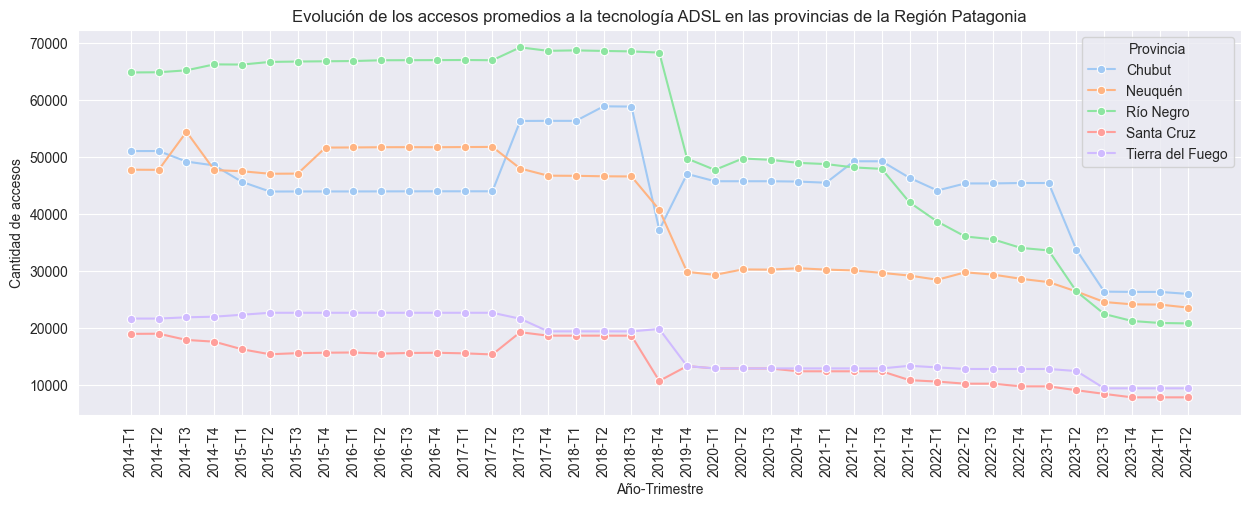

In [549]:
# Agrupar los datos por provincia y trimestre y calcular la media de "ADSL"
promedio_adsl = patagonia.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['ADSL'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_adsl['Año-Trimestre'] = promedio_adsl['Año'].astype(str) + '-T' + promedio_adsl['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_adsl, x='Año-Trimestre', y='ADSL', hue='Provincia', style='Provincia', dashes=False,
            palette='pastel', marker = 'o')

# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología ADSL en las provincias de la Región Patagonia')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

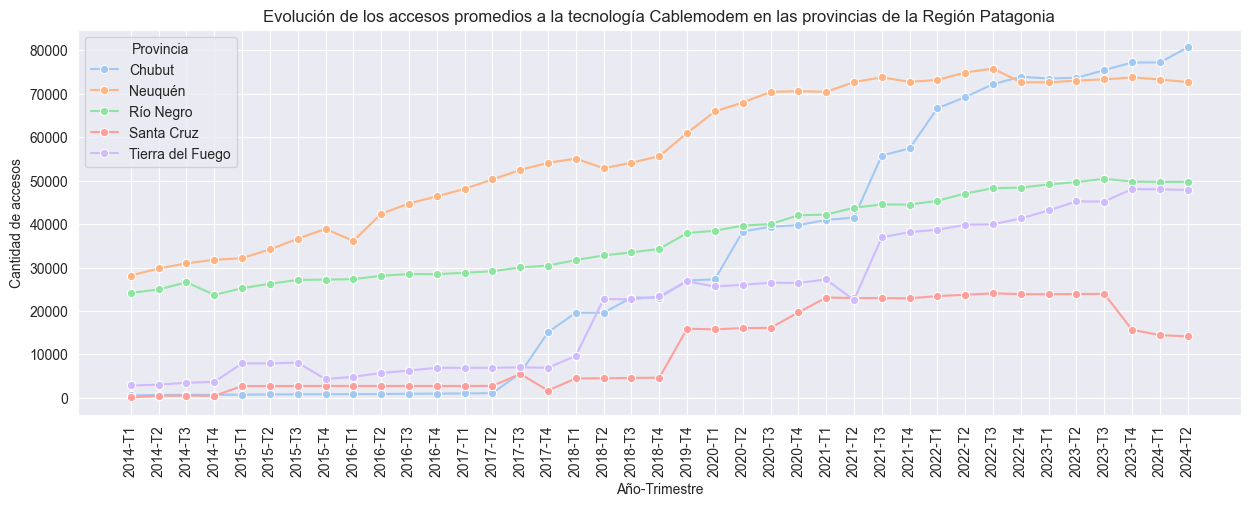

In [550]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Cablemodem"
promedio_cablemodem = patagonia.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Cablemodem'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_cablemodem['Año-Trimestre'] = promedio_cablemodem['Año'].astype(str) + '-T' + promedio_cablemodem['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_cablemodem, x='Año-Trimestre', y='Cablemodem', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')

# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología Cablemodem en las provincias de la Región Patagonia')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

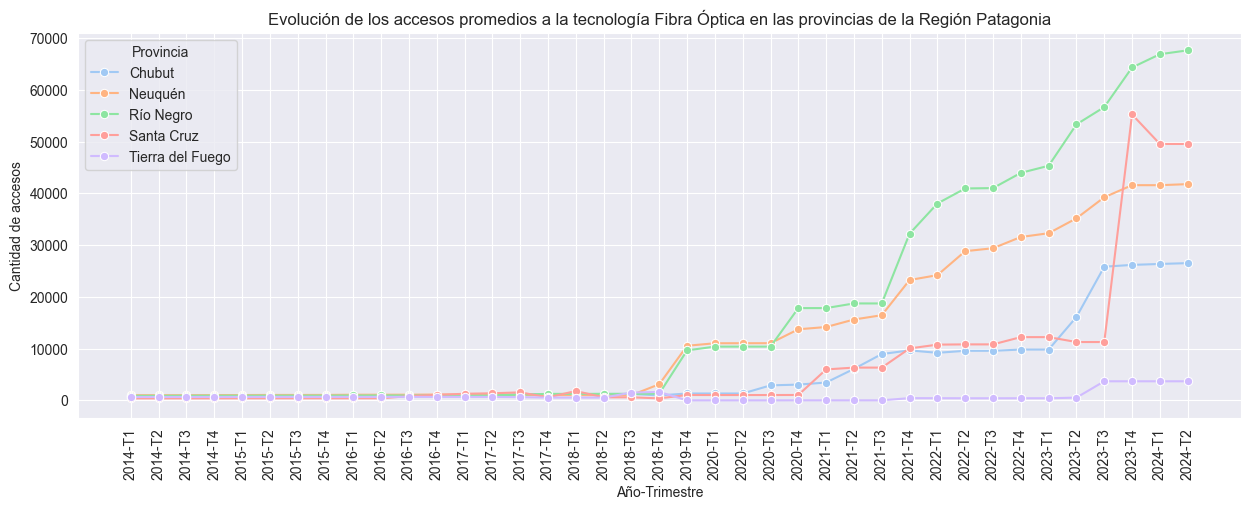

In [551]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Fibra óptica"
promedio_fop = patagonia.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Fibra óptica'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_fop['Año-Trimestre'] = promedio_fop['Año'].astype(str) + '-T' + promedio_fop['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_fop, x='Año-Trimestre', y='Fibra óptica', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología Fibra Óptica en las provincias de la Región Patagonia')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

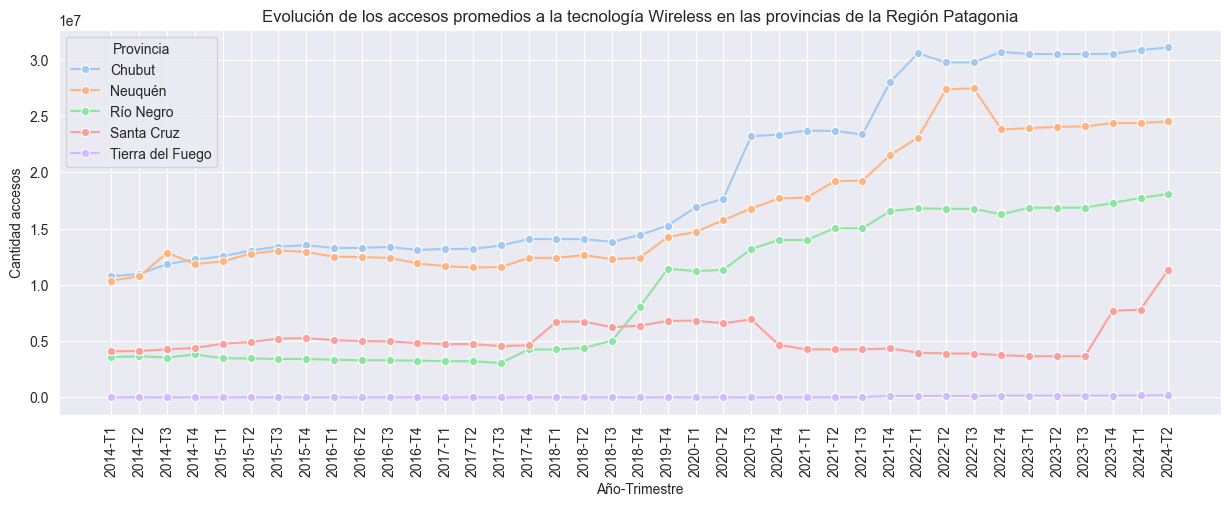

In [552]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Wireless"
promedio_wireless = patagonia.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Wireless'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_wireless['Año-Trimestre'] = promedio_wireless['Año'].astype(str) + '-T' + promedio_wireless['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_wireless, x='Año-Trimestre', y='Wireless', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología Wireless en las provincias de la Región Patagonia')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

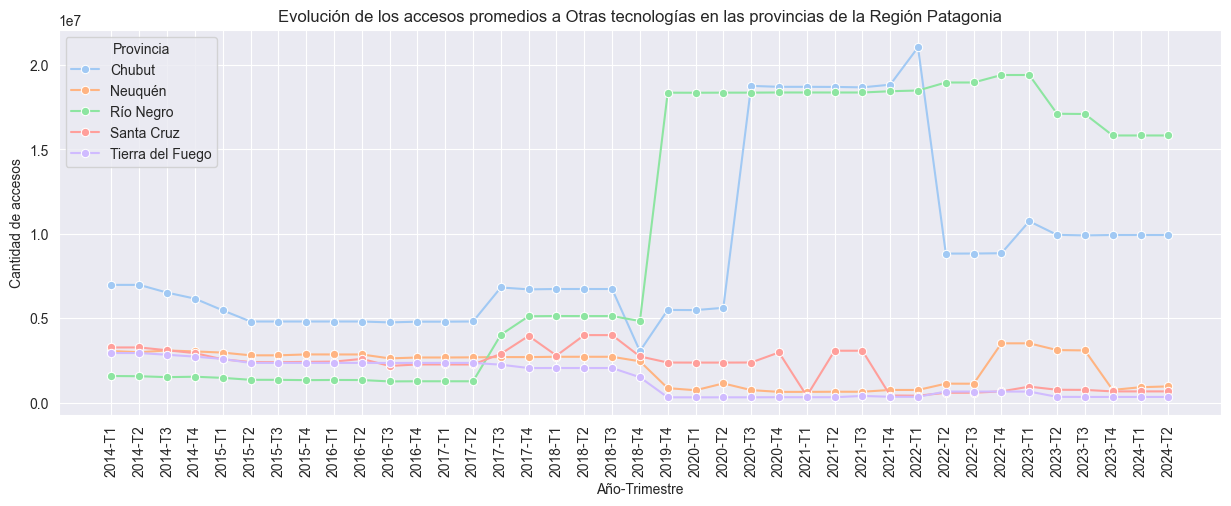

In [553]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Otros"
promedio_otro = patagonia.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Otros'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_otro['Año-Trimestre'] = promedio_otro['Año'].astype(str) + '-T' + promedio_otro['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_otro, x='Año-Trimestre', y='Otros', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a Otras tecnologías en las provincias de la Región Patagonia')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

##### Región de Cuyo

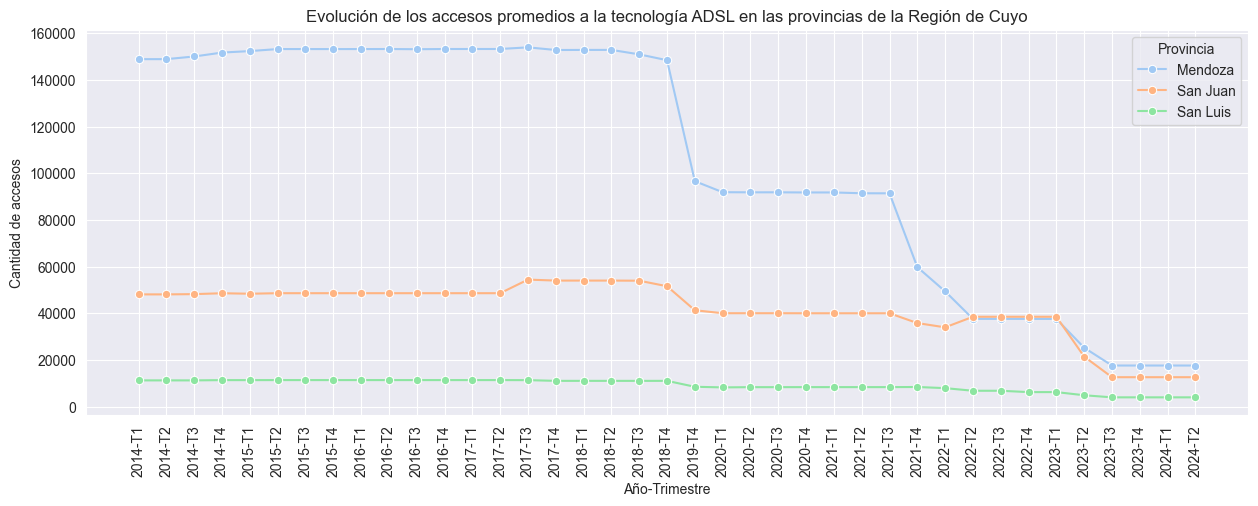

In [554]:
# Agrupar los datos por provincia y trimestre y calcular la media de "ADSL"
promedio_adsl = cuyo.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['ADSL'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_adsl['Año-Trimestre'] = promedio_adsl['Año'].astype(str) + '-T' + promedio_adsl['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_adsl, x='Año-Trimestre', y='ADSL', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología ADSL en las provincias de la Región de Cuyo')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

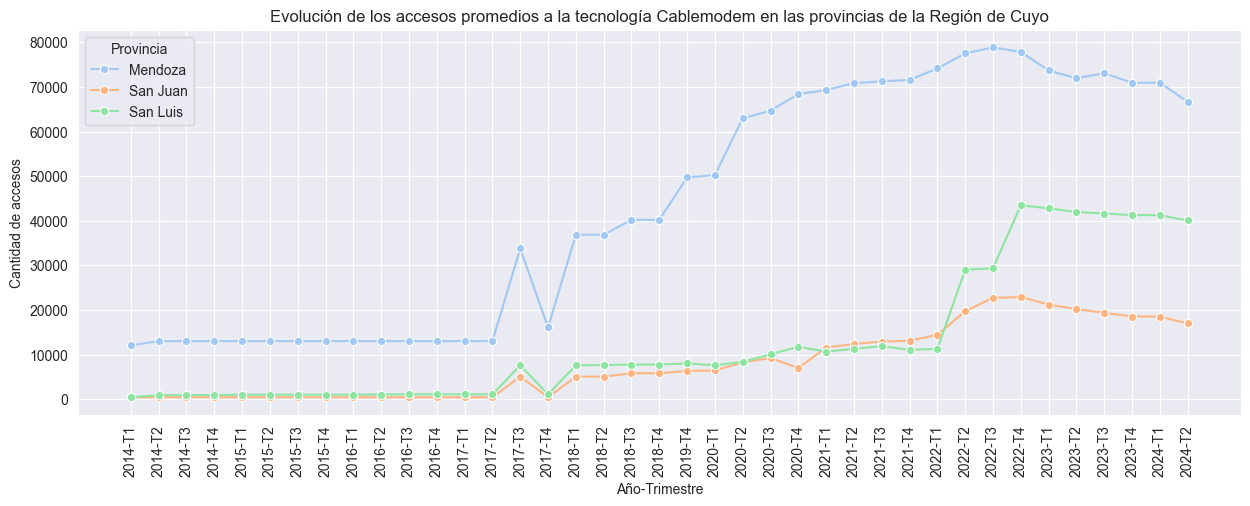

In [555]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Cablemodem"
promedio_cablemodem = cuyo.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Cablemodem'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_cablemodem['Año-Trimestre'] = promedio_cablemodem['Año'].astype(str) + '-T' + promedio_cablemodem['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_cablemodem, x='Año-Trimestre', y='Cablemodem', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología Cablemodem en las provincias de la Región de Cuyo')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

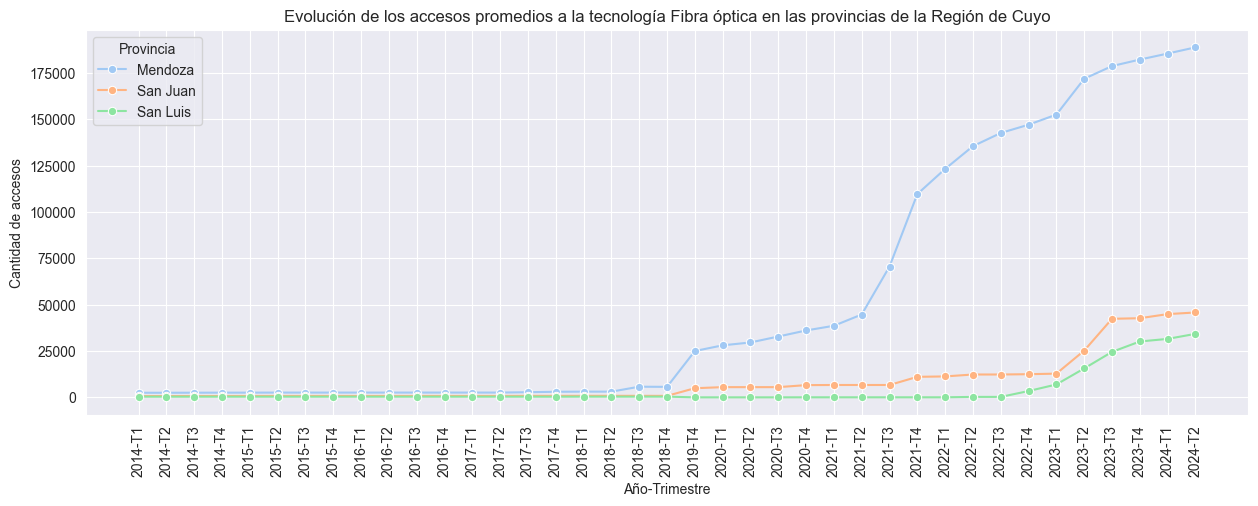

In [556]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Fibra óptica"
promedio_fop = cuyo.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Fibra óptica'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_fop['Año-Trimestre'] = promedio_fop['Año'].astype(str) + '-T' + promedio_fop['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_fop, x='Año-Trimestre', y='Fibra óptica', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología Fibra óptica en las provincias de la Región de Cuyo')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

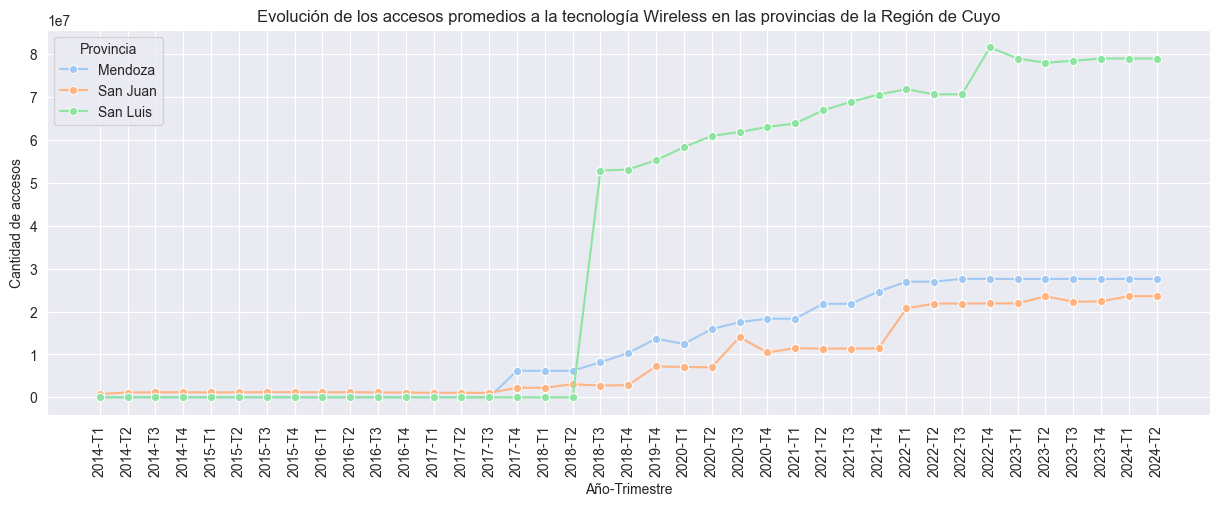

In [557]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Wireless"
promedio_wireless = cuyo.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Wireless'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_wireless['Año-Trimestre'] = promedio_wireless['Año'].astype(str) + '-T' + promedio_wireless['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_wireless, x='Año-Trimestre', y='Wireless', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología Wireless en las provincias de la Región de Cuyo')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

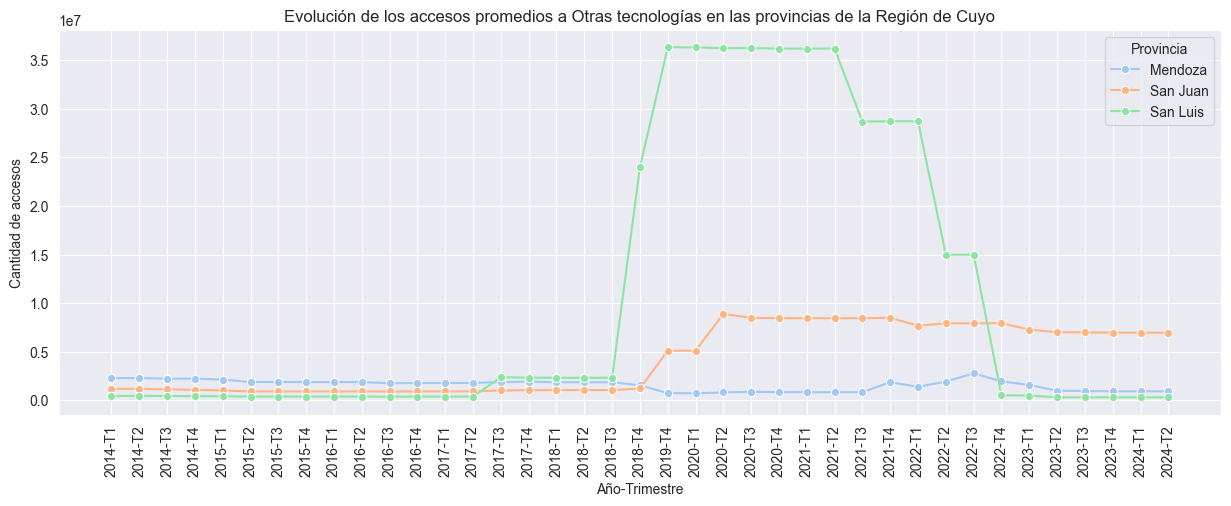

In [558]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Otros"
promedio_otro = cuyo.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Otros'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_otro['Año-Trimestre'] = promedio_otro['Año'].astype(str) + '-T' + promedio_otro['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_otro, x='Año-Trimestre', y='Otros', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a Otras tecnologías en las provincias de la Región de Cuyo')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

##### Región Pampeana

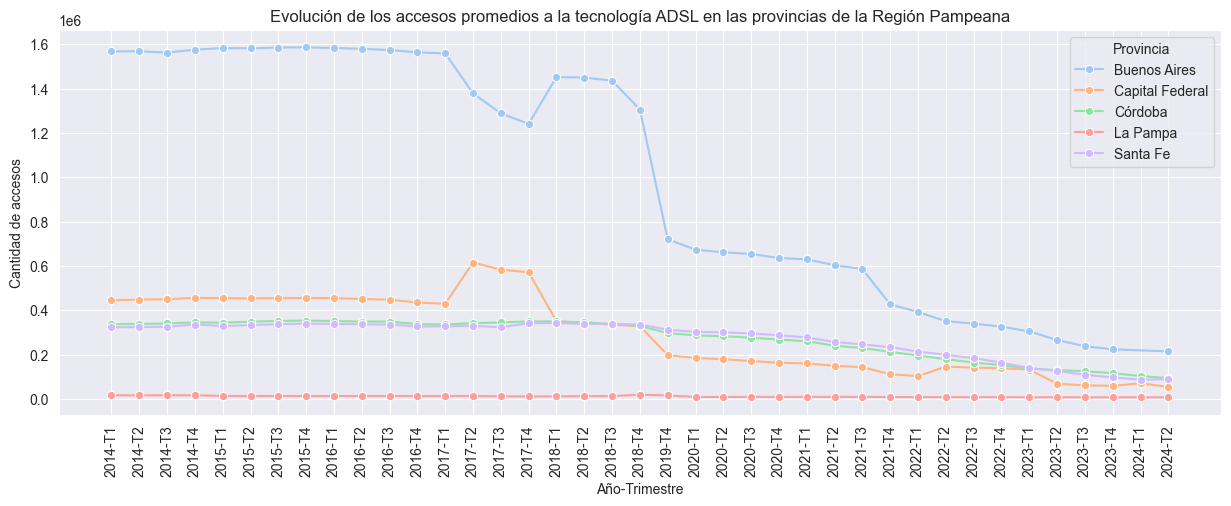

In [559]:
# Agrupar los datos por provincia y trimestre y calcular la media de "ADSL"
promedio_adsl = pampeana.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['ADSL'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_adsl['Año-Trimestre'] = promedio_adsl['Año'].astype(str) + '-T' + promedio_adsl['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_adsl, x='Año-Trimestre', y='ADSL', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología ADSL en las provincias de la Región Pampeana')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

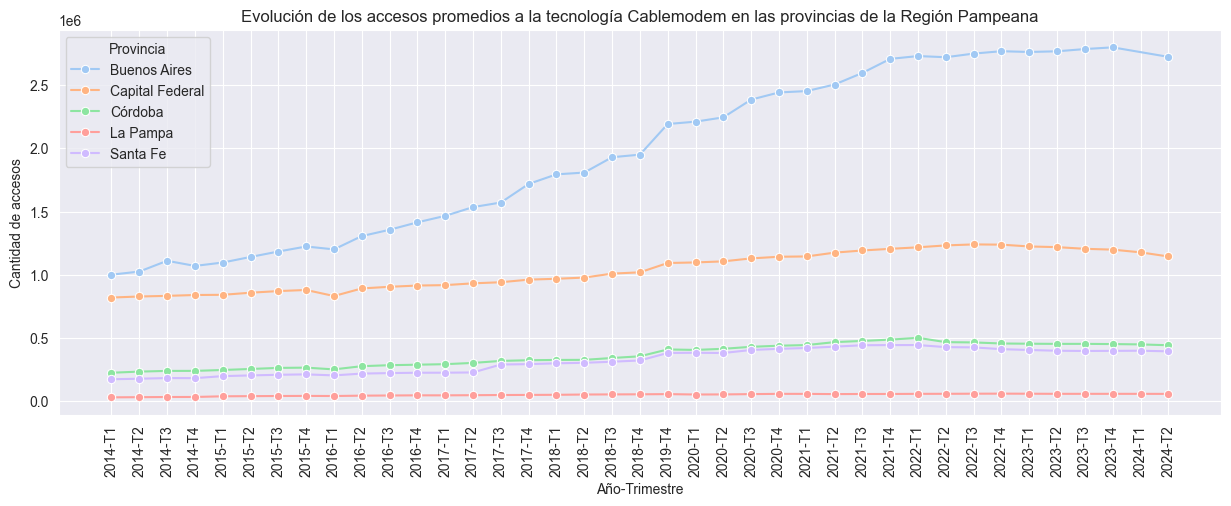

In [560]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Cablemodem"
promedio_cablemodem = pampeana.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Cablemodem'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_cablemodem['Año-Trimestre'] = promedio_cablemodem['Año'].astype(str) + '-T' + promedio_cablemodem['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_cablemodem, x='Año-Trimestre', y='Cablemodem', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología Cablemodem en las provincias de la Región Pampeana')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

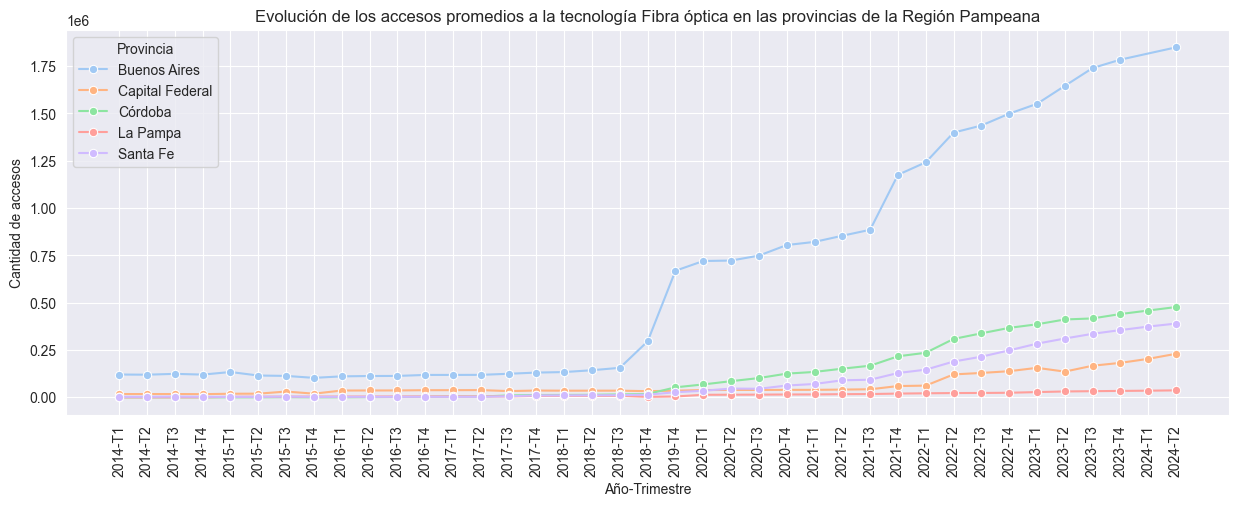

In [561]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Fibra óptica"
promedio_fop = pampeana.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Fibra óptica'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_fop['Año-Trimestre'] = promedio_fop['Año'].astype(str) + '-T' + promedio_fop['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_fop, x='Año-Trimestre', y='Fibra óptica', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología Fibra óptica en las provincias de la Región Pampeana')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

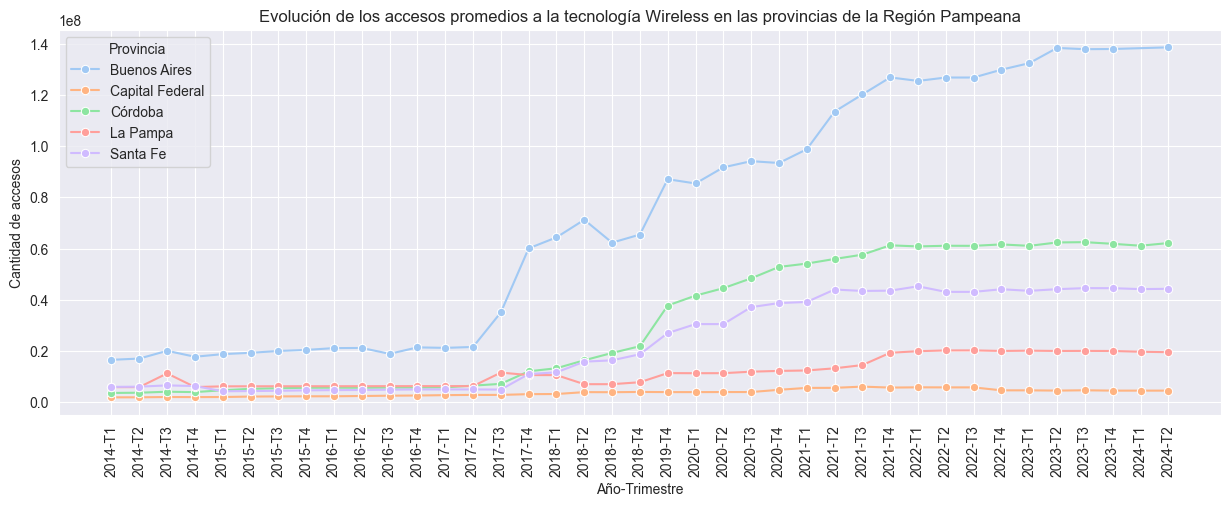

In [562]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Wireless"
promedio_wireless = pampeana.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Wireless'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_wireless['Año-Trimestre'] = promedio_wireless['Año'].astype(str) + '-T' + promedio_wireless['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_wireless, x='Año-Trimestre', y='Wireless', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología Wireless en las provincias de la Región Pampeana')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

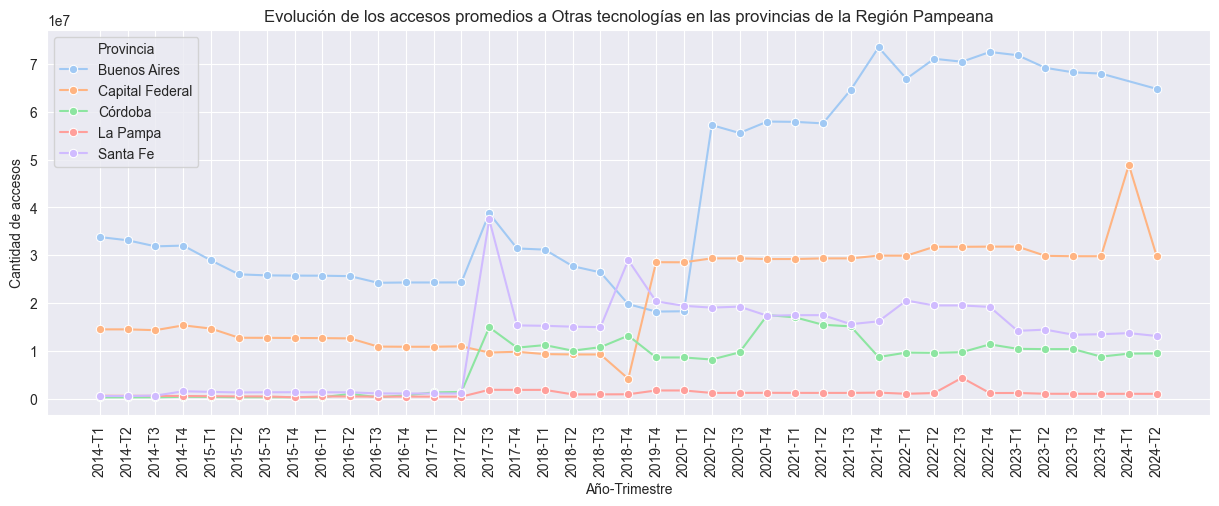

In [563]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Otros"
promedio_otro = pampeana.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Otros'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_otro['Año-Trimestre'] = promedio_otro['Año'].astype(str) + '-T' + promedio_otro['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_otro, x='Año-Trimestre', y='Otros', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a Otras tecnologías en las provincias de la Región Pampeana')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

##### Región Noroeste

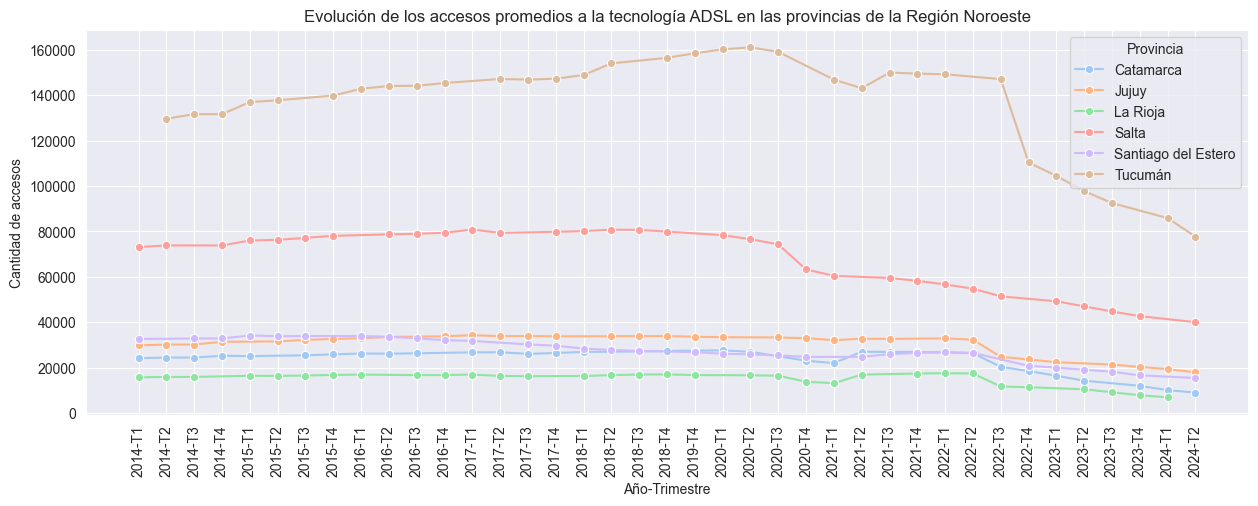

In [564]:
# Agrupar los datos por provincia y trimestre y calcular la media de "ADSL"
prpromedio_adsl = noroeste.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['ADSL'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
prpromedio_adsl['Año-Trimestre'] =promedio_adsl['Año'].astype(str) + '-T' +promedio_adsl['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=prpromedio_adsl, x='Año-Trimestre', y='ADSL', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología ADSL en las provincias de la Región Noroeste')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

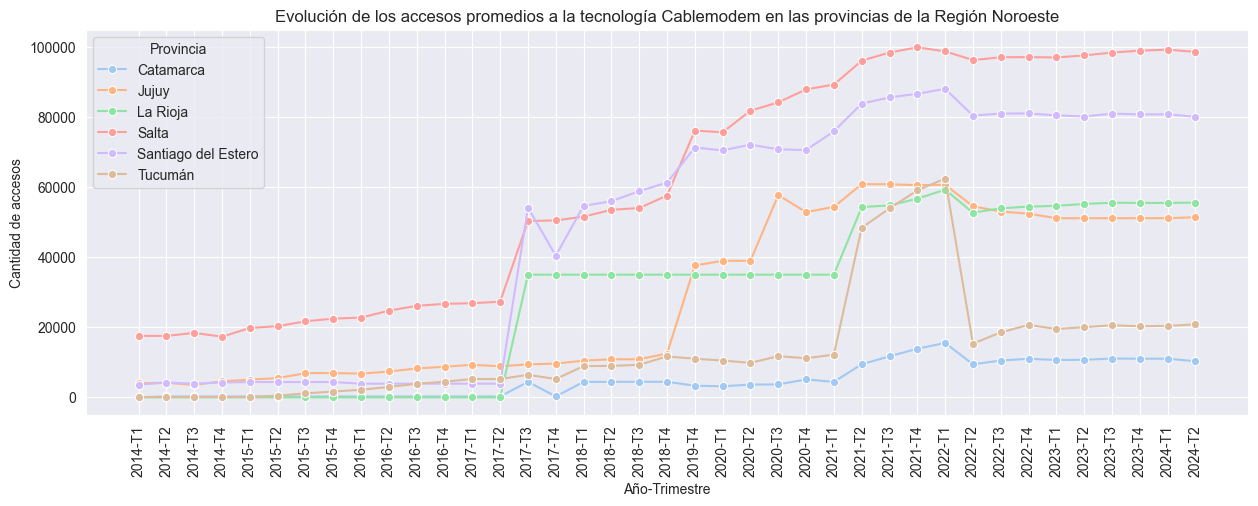

In [565]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Cablemodem"
promedio_cablemodem = noroeste.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Cablemodem'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_cablemodem['Año-Trimestre'] = promedio_cablemodem['Año'].astype(str) + '-T' + promedio_cablemodem['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_cablemodem, x='Año-Trimestre', y='Cablemodem', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología Cablemodem en las provincias de la Región Noroeste')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

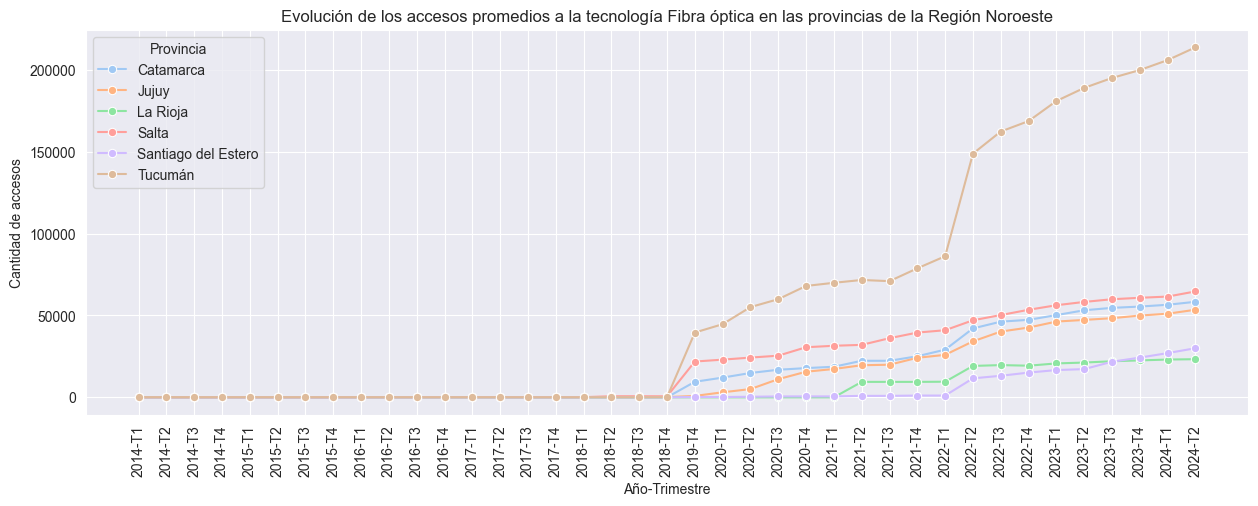

In [566]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Fibra óptica"
promedio_fop = noroeste.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Fibra óptica'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_fop['Año-Trimestre'] = promedio_fop['Año'].astype(str) + '-T' + promedio_fop['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_fop, x='Año-Trimestre', y='Fibra óptica', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología Fibra óptica en las provincias de la Región Noroeste')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

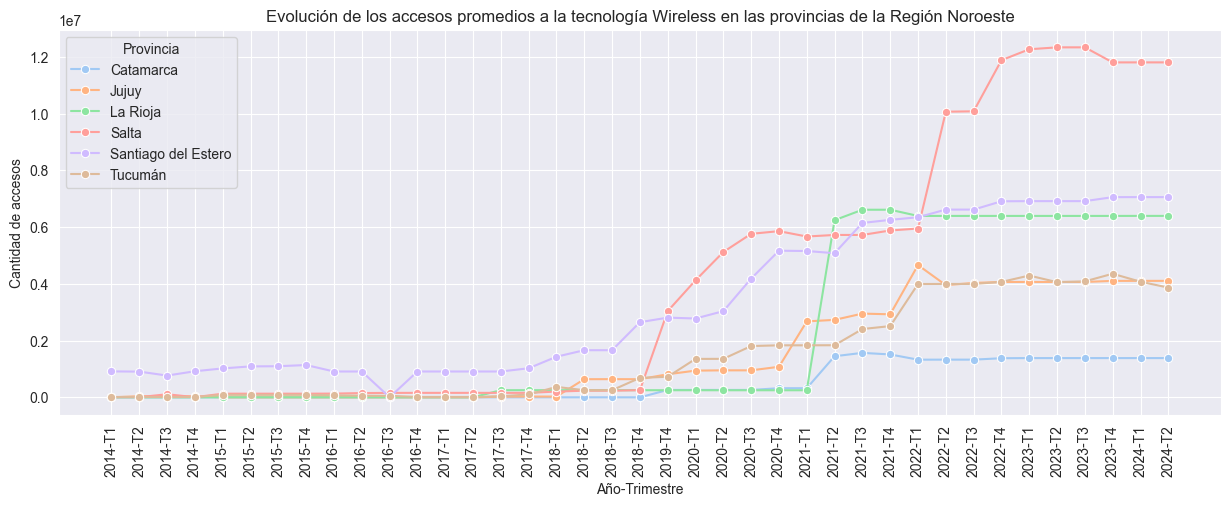

In [567]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Wireless"
promedio_wireless = noroeste.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Wireless'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_wireless['Año-Trimestre'] = promedio_wireless['Año'].astype(str) + '-T' + promedio_wireless['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_wireless, x='Año-Trimestre', y='Wireless', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología Wireless en las provincias de la Región Noroeste')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

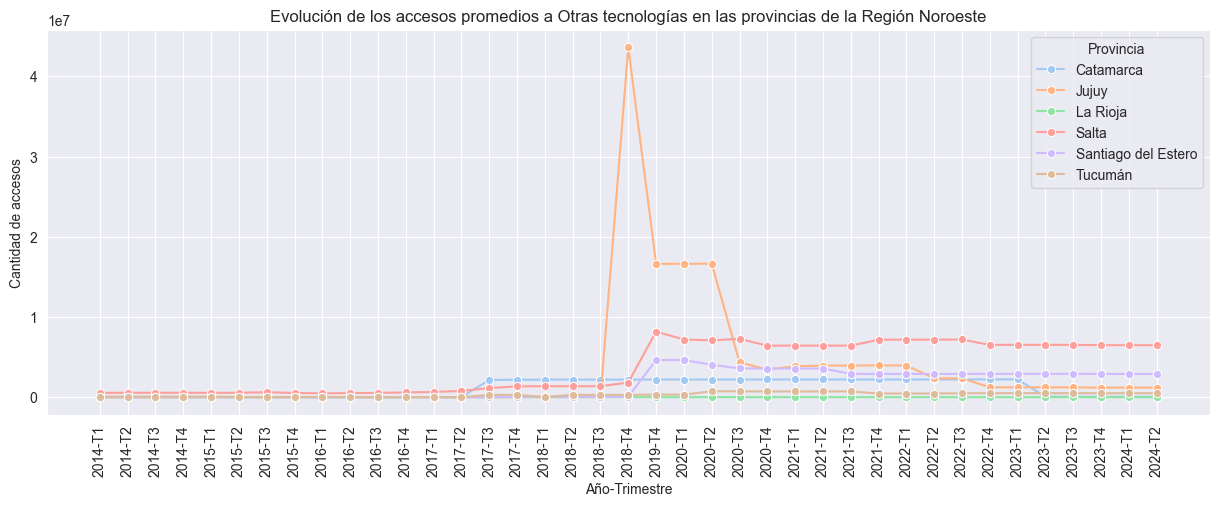

In [568]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Otros"
promedio_otro = noroeste.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Otros'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_otro['Año-Trimestre'] = promedio_otro['Año'].astype(str) + '-T' + promedio_otro['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_otro, x='Año-Trimestre', y='Otros', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a Otras tecnologías en las provincias de la Región Noroeste')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

##### Región Noreste

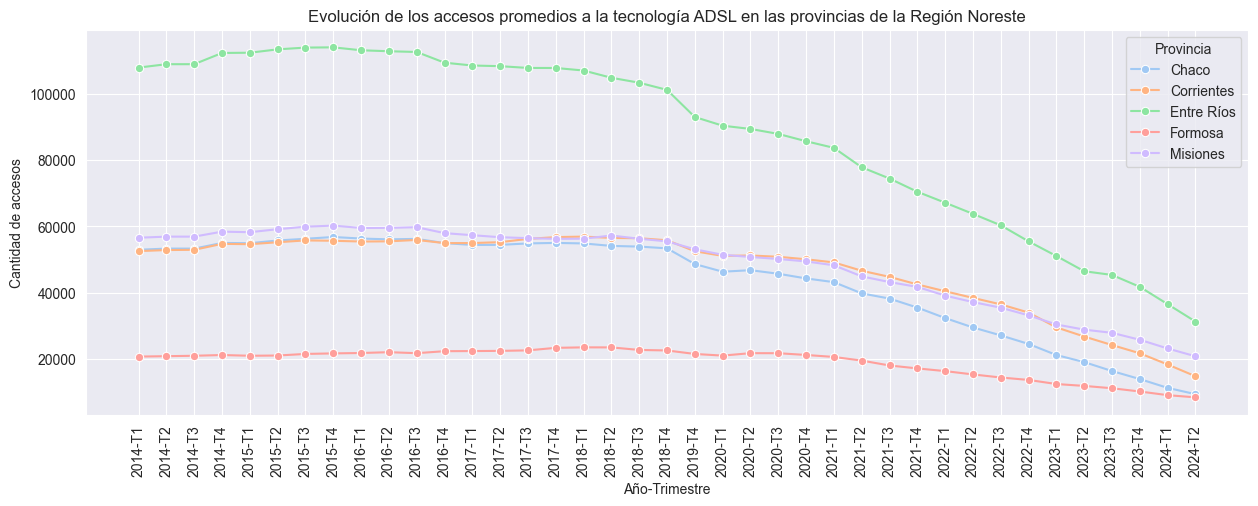

In [569]:
# Agrupar los datos por provincia y trimestre y calcular la media de "ADSL"
promedio_adsl = noreste.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['ADSL'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_adsl['Año-Trimestre'] = promedio_adsl['Año'].astype(str) + '-T' + promedio_adsl['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_adsl, x='Año-Trimestre', y='ADSL', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología ADSL en las provincias de la Región Noreste')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

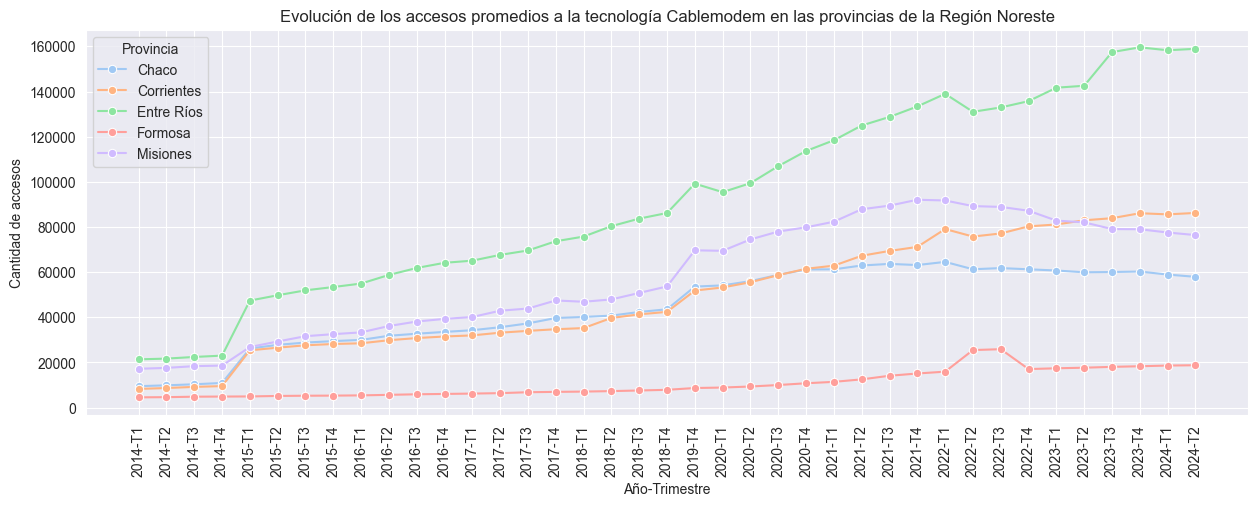

In [570]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Cablemodem"
promedio_cablemodem = noreste.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Cablemodem'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_cablemodem['Año-Trimestre'] = promedio_cablemodem['Año'].astype(str) + '-T' + promedio_cablemodem['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_cablemodem, x='Año-Trimestre', y='Cablemodem', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología Cablemodem en las provincias de la Región Noreste')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

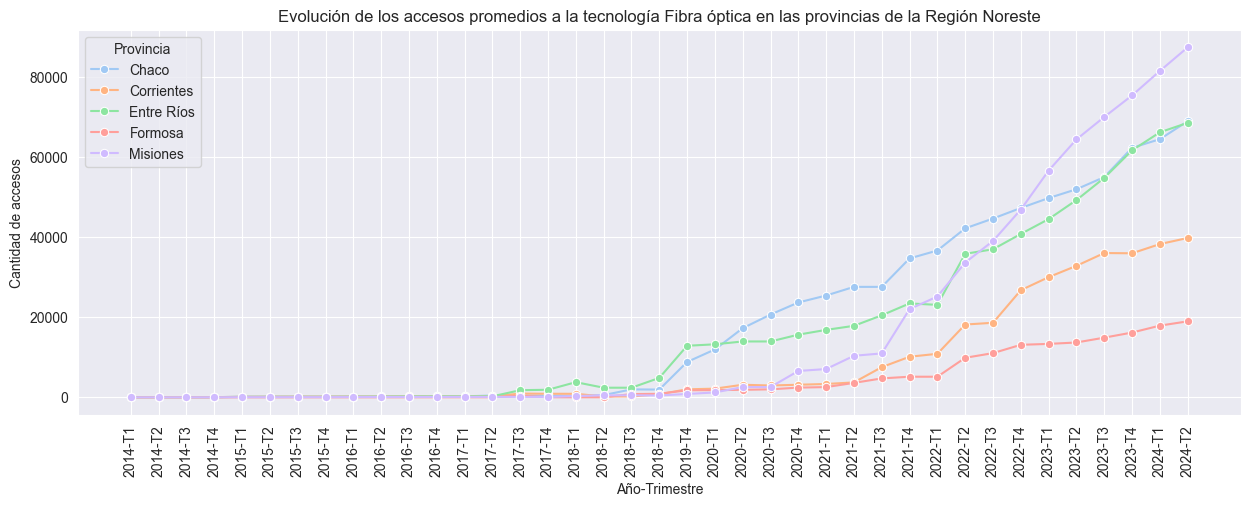

In [571]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Fibra óptica"
promedio_fop = noreste.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Fibra óptica'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_fop['Año-Trimestre'] = promedio_fop['Año'].astype(str) + '-T' + promedio_fop['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_fop, x='Año-Trimestre', y='Fibra óptica', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología Fibra óptica en las provincias de la Región Noreste')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

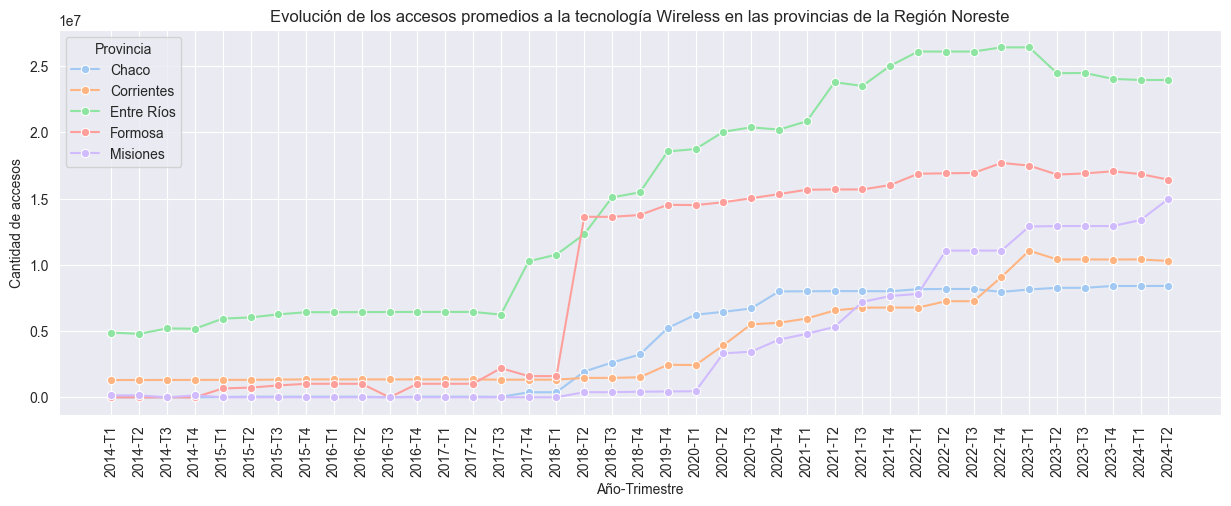

In [572]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Wireless"
promedio_wireless = noreste.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Wireless'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_wireless['Año-Trimestre'] = promedio_wireless['Año'].astype(str) + '-T' + promedio_wireless['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_wireless, x='Año-Trimestre', y='Wireless', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a la tecnología Wireless en las provincias de la Región Noreste')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

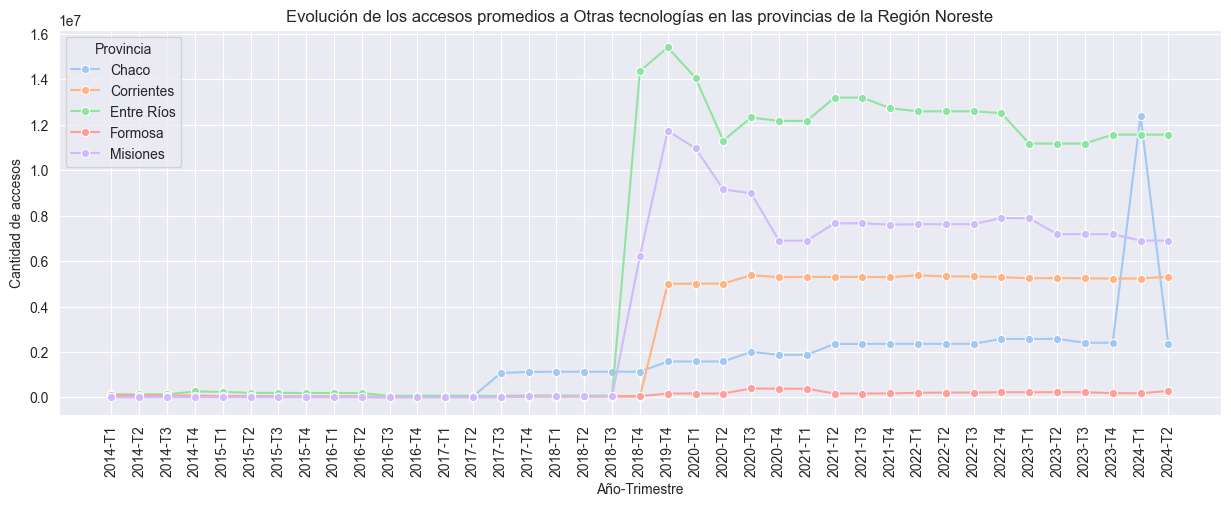

In [573]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Otros"
promedio_otro = noreste.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Otros'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
promedio_otro['Año-Trimestre'] = promedio_otro['Año'].astype(str) + '-T' + promedio_otro['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=promedio_otro, x='Año-Trimestre', y='Otros', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los accesos promedios a Otras tecnologías en las provincias de la Región Noreste')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

In [593]:
acceso_tecnologia_limpio.to_csv('acceso_tecnologia_provincia.csv', sep = ',', index = False, encoding = 'ISO 8859-1')

## Total Accesos de Internet por tipo de tecnología

In [574]:
# Carga del archivo 'Totales Accesos Por Tecnología'
total_acceso_tecnologia= pd.read_excel(r'Dataset\Internet.xlsx', sheet_name='Totales Accesos Por Tecnología')

In [575]:
# Imprimir las primeras 5 filas de "acceso_internet_tecnologia"
total_acceso_tecnologia.head()

Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0  2024          2   733491     5867504       4169958    593197  191957   
1  2024          1   774475     5986957       4015101    598682  257941   
2  2023          4   836390     6022532       3908183    585760  194796   
3  2023          3   897895     6018832       3708718    581436  200027   
4  2023          2  1006509     5997149       3463988    581823  202428   

      Total        Periodo  
0  11556107   Abr-Jun 2024  
1  11633156   Ene-Mar 2024  
2  11547661   Oct-Dic 2023  
3  11406908  Jul-Sept 2023  
4  11251897   Abr-Jun 2023

In [576]:
# Mostrar información del número de columnas, filas, tipos de datos y valores faltantes en "acceso_internet_tecnologia"
total_acceso_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           42 non-null     int64 
 1   Trimestre     42 non-null     int64 
 2   ADSL          42 non-null     int64 
 3   Cablemodem    42 non-null     int64 
 4   Fibra óptica  42 non-null     int64 
 5   Wireless      42 non-null     int64 
 6   Otros         42 non-null     int64 
 7   Total         42 non-null     int64 
 8   Periodo       42 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.1+ KB


In [577]:
# Se crea una columna 'Fecha' combinando 'Año' y 'Trimestre' en un objeto de fecha
total_acceso_tecnologia['Fecha'] = pd.to_datetime(total_acceso_tecnologia['Año'].astype(str) + 'Q' +total_acceso_tecnologia['Trimestre'].astype(str))

In [578]:
# Mostrar un resumen estadístico de las columnas numériocas de "acceso_internet_tecnologia"
total_acceso_tecnologia.describe()

Año  Trimestre          ADSL    Cablemodem  Fibra óptica  \
count    42.000000  42.000000  4.200000e+01  4.200000e+01  4.200000e+01   
mean   2018.761905   2.452381  2.694844e+06  4.433906e+06  1.224694e+06   
min    2014.000000   1.000000  7.334910e+05  2.407330e+06  1.391870e+05   
25%    2016.000000   1.250000  1.730869e+06  3.146292e+06  1.719410e+05   
50%    2019.000000   2.000000  3.061623e+06  4.535507e+06  6.989465e+05   
75%    2021.000000   3.000000  3.713298e+06  5.857192e+06  1.945689e+06   
max    2024.000000   4.000000  3.803024e+06  6.073426e+06  4.169958e+06   
std       3.074756   1.130560  1.094347e+06  1.319783e+06  1.321136e+06   

            Wireless          Otros         Total  \
count      42.000000      42.000000  4.200000e+01   
mean   304293.214286  158186.071429  8.815923e+06   
min     70749.000000   54300.000000  6.398398e+06   
25%     85390.500000   70430.000000  7.218131e+06   
50%    292223.000000  185221.000000  8.720658e+06   
75%    515434.000000  244069.500000  1.038873e+07   
max    598682.000000  265328.000000  1.163316e+07   
std    203202.399993   82363.507846  1.733189e+06   

                               Fecha  
count                             42  
mean   2019-02-14 23:25:42.857142784  
min              2014-01-01 00:00:00  
25%              2016-07-24 00:00:00  
50%              2019-02-15 00:00:00  
75%              2021-09-08 00:00:00  
max              2024-04-01 00:00:00  
std                              NaN

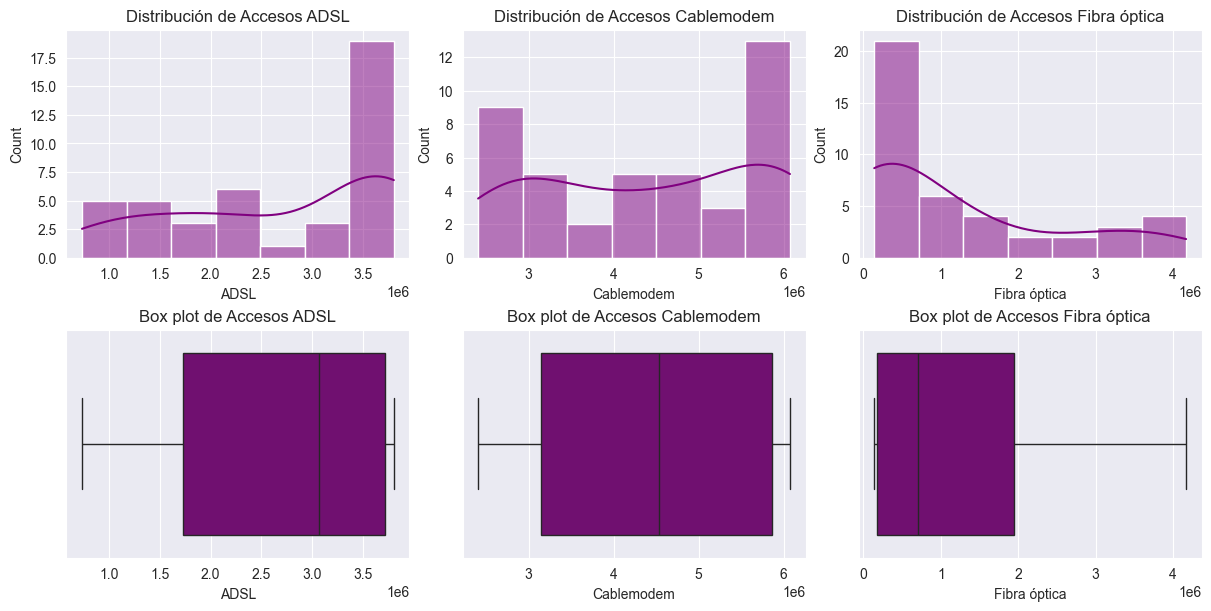

In [579]:
# Observando la distribución de los datos
fig, axes = plt.subplots(2, 3, figsize=(12, 6), constrained_layout = True)

# Histograma y boxplot de la columna 'ADSL'
sns.histplot(data = total_acceso_tecnologia, x = 'ADSL', kde = True, color = 'purple', ax = axes[0,0])
ax = axes[0,0].set_title('Distribución de Accesos ADSL')
sns.boxplot(data = total_acceso_tecnologia, x='ADSL', linewidth = 1, color = 'purple', ax = axes[1,0])
axes[1,0].set_title('Box plot de Accesos ADSL')
# Histograma y boxplot de la columna 'Cablemodem'
sns.histplot(data = total_acceso_tecnologia, x='Cablemodem', kde = True, color = 'purple', ax = axes[0,1])
axes[0,1].set_title('Distribución de Accesos Cablemodem')
sns.boxplot(data = total_acceso_tecnologia, x='Cablemodem', linewidth = 1, color = 'purple', ax = axes[1,1])
axes[1,1].set_title('Box plot de Accesos Cablemodem')
# Histograma y boxplot de la columna 'Fibra óptica'
sns.histplot(data = total_acceso_tecnologia, x = 'Fibra óptica', kde = True, color = 'purple',
            ax = axes[0,2])
axes[0,2].set_title('Distribución de Accesos Fibra óptica')
sns.boxplot(data = total_acceso_tecnologia, x='Fibra óptica', linewidth = 1, color = 'purple', ax = axes[1,2])
axes[1,2].set_title('Box plot de Accesos Fibra óptica')

# Mostrar gráfico completo
plt.show()

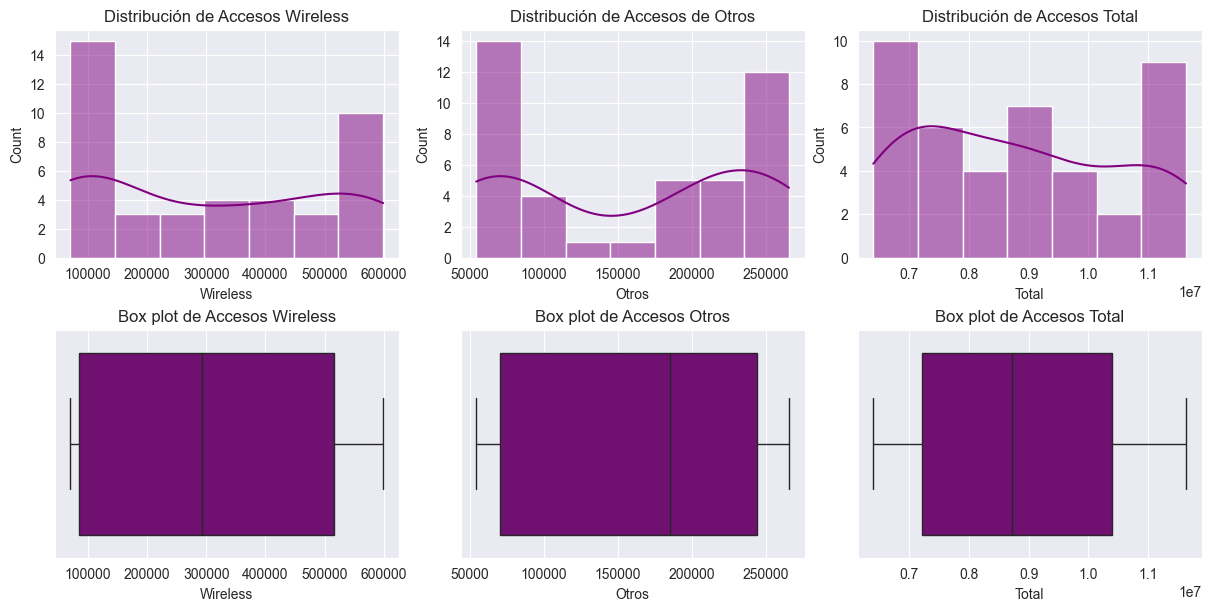

In [580]:
# Observando la distribución de los datos
fig, axes = plt.subplots(2, 3, figsize=(12, 6), constrained_layout = True)

# Histograma y boxplot de la columna 'Wireless'
sns.histplot(data = total_acceso_tecnologia, x = 'Wireless', kde = True, color = 'purple', ax = axes[0,0])
ax = axes[0,0].set_title('Distribución de Accesos Wireless')
sns.boxplot(data = total_acceso_tecnologia, x='Wireless', linewidth = 1, color = 'purple', ax = axes[1,0])
axes[1,0].set_title('Box plot de Accesos Wireless')
# Histograma y boxplot de la columna 'Otros'
sns.histplot(data = total_acceso_tecnologia, x='Otros', kde = True, color = 'purple', ax = axes[0,1])
axes[0,1].set_title('Distribución de Accesos de Otros')
sns.boxplot(data = total_acceso_tecnologia, x='Otros', linewidth = 1, color = 'purple', ax = axes[1,1])
axes[1,1].set_title('Box plot de Accesos Otros')
# Histograma y boxplot de la columna 'Total'
sns.histplot(data = total_acceso_tecnologia, x = 'Total', kde = True, color = 'purple', ax = axes[0,2])
axes[0,2].set_title('Distribución de Accesos Total')
sns.boxplot(data = total_acceso_tecnologia, x='Total', linewidth = 1, color = 'purple', ax = axes[1,2])
axes[1,2].set_title('Box plot de Accesos Total')

# Mostrar gráfico completo
plt.show()

In [581]:
# Calcular la suma total de accesos a cada tipo de tecnología
sumas_por_tecnologia = total_acceso_tecnologia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Obtener el nombre de la columna con la suma total más alta
tecnologia_mas_utilizada = sumas_por_tecnologia.idxmax()

# Imprimir el resultado
print("La tecnología más utilizada es:", tecnologia_mas_utilizada)

La tecnología más utilizada es: Cablemodem


In [582]:
# Agrupar los datos por año y sumar los accesos a cada tipo de tecnología
total_acceso_tecnologia.groupby(['Año'])[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].sum()

ADSL  Cablemodem  Fibra óptica  Wireless    Otros     Total
Año                                                                  
2014  14884750     9975087        604862    305234   286700  26056633
2015  15115694    11162971        620877    331431   242846  27473819
2016  15073814    12177088        680127    337396   227633  28496058
2017  14639302    14148063        766312    432844   344162  30330683
2018  13981984    16571272       1079124    870047   465760  32968187
2019  11447626    18754974       3191409   1262831   909341  35566181
2020   9072828    20539964       4636620   1563813   958018  36771243
2021   7802044    22877010       6473506   1927038  1006793  40086391
2022   5712223    24122067      10874934   2232136   940575  43881935
2023   3945211    24041095      14324300   2325666   812089  45448361
2024   1507966    11854461       8185059   1191879   449898  23189263

- Total de accesos a Internet: aumentó constantemente durante los últimos años, en el año 2014 con 26.05 millones y durante los primeros dos trimestres del año 2024 hay un total de 23.18 millones.
- La tecnología ADSL disminuyó desde el 2014, mientras que las tecnologías modernas aumentaron constantemente. La fibra optica tuvo un crecimiento pasando los 14 millones en el año 2023. 
- Cablemódem superó al ADSL a partir del año 2018. 
- Wireless tuvo un crecimiento constante pero lento, manteniendose estable y pasando el millón a partir del 2022. 
- La variable 'Otros' tuvo variaciones a lo largo de los años. 

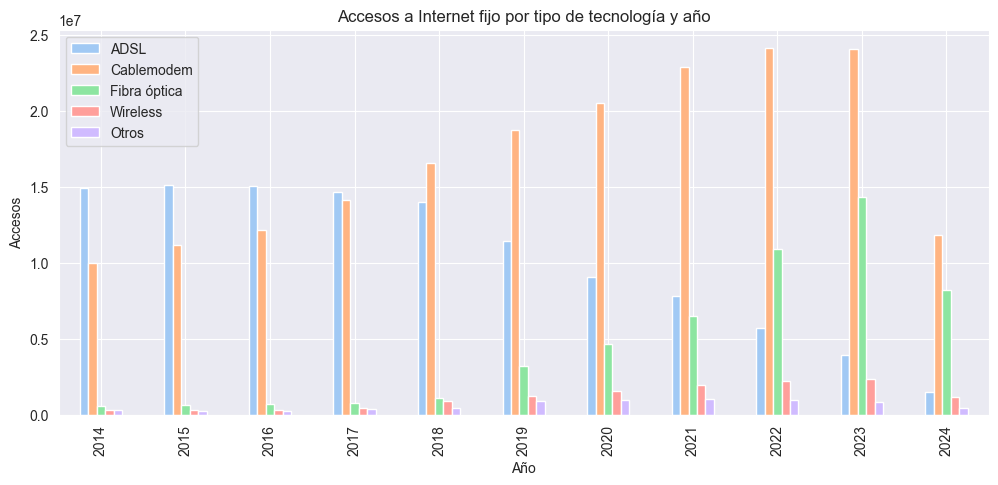

In [583]:
# Agrupar los datos por año y sumar los accesos a cada tipo de tecnología
datos_agrupados_por_año = total_acceso_tecnologia.groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Crear el gráfico de barras con las columnas una al lado de la otra
sns.set_palette('pastel')
ax = datos_agrupados_por_año.plot(kind='bar', figsize=(12, 5))

# Agregar el título y los nombres de los ejes
ax.set_title('Accesos a Internet fijo por tipo de tecnología y año')
ax.set_xlabel('Año')
ax.set_ylabel('Accesos')

# Mostrar el gráfico
plt.show()

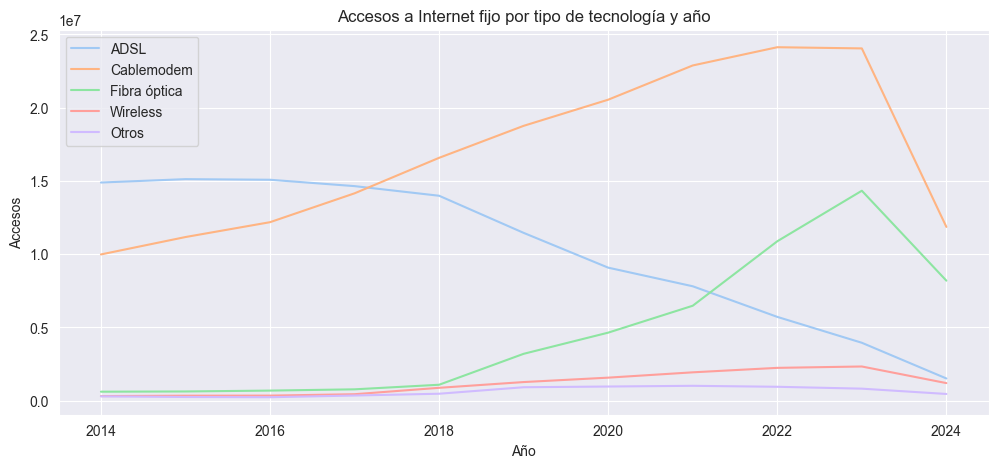

In [584]:
# Agrupar los datos por año y sumar los accesos a cada tipo de tecnología
datos_agrupados_por_año = total_acceso_tecnologia.groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Crear el gráfico de líneas
sns.set_palette('pastel')
ax = datos_agrupados_por_año.plot(kind='line', figsize=(12, 5))

# Agregar el título y los nombres de los ejes
ax.set_title('Accesos a Internet fijo por tipo de tecnología y año')
ax.set_xlabel('Año')
ax.set_ylabel('Accesos')

# Mostrar el gráfico
plt.show()

In [585]:
# Filtrar los datos para obtener solo los del año 2023 y 2024 respectivamente
df_2023_2024 = total_acceso_tecnologia[total_acceso_tecnologia["Año"].isin([2023, 2024])]

# Agrupar los datos por año y tecnología y sumar los valores
grupo_tecno_año = df_2023_2024.groupby(['Año'])[['Fibra óptica', 'Cablemodem', 'ADSL', 'Wireless', 'Otros']].sum()

# Calcular el total de accesos a Internet fijo en Argentina en 2021 y 2024
total_accesos_2023 = grupo_tecno_año.loc[2023].sum()
total_accesos_2024 = grupo_tecno_año.loc[2024].sum()

# Calcular el porcentaje de accesos por cada tecnología en 2023 y en 2024
porcentaje_tecno_2023 = grupo_tecno_año.loc[2023] / total_accesos_2023 * 100
porcentaje_tecno_2024 = grupo_tecno_año.loc[2024] / total_accesos_2024 * 100

# Imprimir los resultados
print("Año 2023")
for tecno in porcentaje_tecno_2023.index:
    print("Porcentaje de accesos por {} en 2023: {:.2f}%".format(tecno, porcentaje_tecno_2023.loc[tecno]))
print("\nAño 2024")
for tecno in porcentaje_tecno_2024.index:
    print("Porcentaje de accesos por {} en 2024: {:.2f}%".format(tecno, porcentaje_tecno_2024.loc[tecno]))

Año 2023
Porcentaje de accesos por Fibra óptica en 2023: 31.52%
Porcentaje de accesos por Cablemodem en 2023: 52.90%
Porcentaje de accesos por ADSL en 2023: 8.68%
Porcentaje de accesos por Wireless en 2023: 5.12%
Porcentaje de accesos por Otros en 2023: 1.79%

Año 2024
Porcentaje de accesos por Fibra óptica en 2024: 35.30%
Porcentaje de accesos por Cablemodem en 2024: 51.12%
Porcentaje de accesos por ADSL en 2024: 6.50%
Porcentaje de accesos por Wireless en 2024: 5.14%
Porcentaje de accesos por Otros en 2024: 1.94%


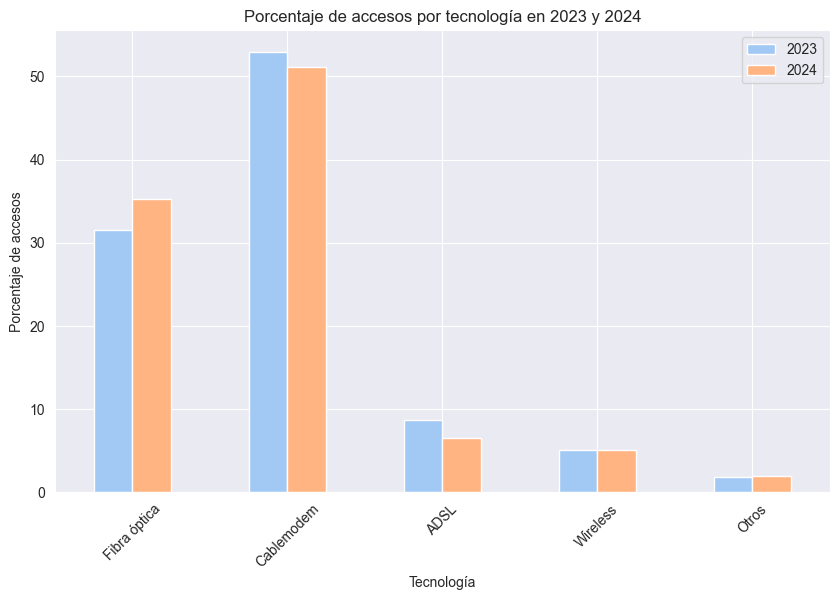

In [586]:
#Unir los DataFrames de porcentajes para facilitar la visualización
porcentajes_todos_años = pd.concat([porcentaje_tecno_2023, porcentaje_tecno_2024], axis=1)
porcentajes_todos_años.columns = ['2023', '2024']

# Crear el gráfico de barras
porcentajes_todos_años.plot(kind='bar', figsize=(10, 6))
plt.title('Porcentaje de accesos por tecnología en 2023 y 2024')
plt.xlabel('Tecnología')
plt.ylabel('Porcentaje de accesos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.legend()
plt.show()

### Evolución en el tiempo ADSL

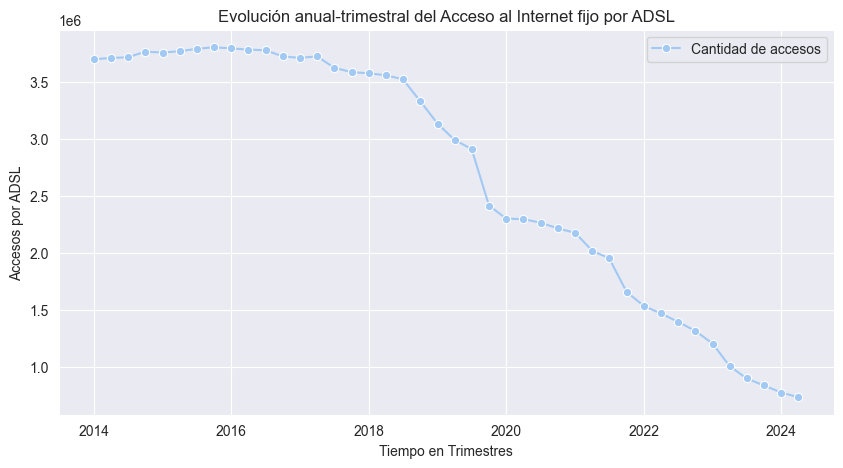

In [587]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Graficar la evolución del Acceso al Internet fijo por ADSL
sns.lineplot(x = 'Fecha', y = 'ADSL', data = total_acceso_tecnologia, label = 'Cantidad de accesos', marker = 'o')
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por ADSL")
plt.title("Evolución anual-trimestral del Acceso al Internet fijo por ADSL")
# Mostrar gráfico completo
plt.show()

### Evolución en el tiempo Cablemodem

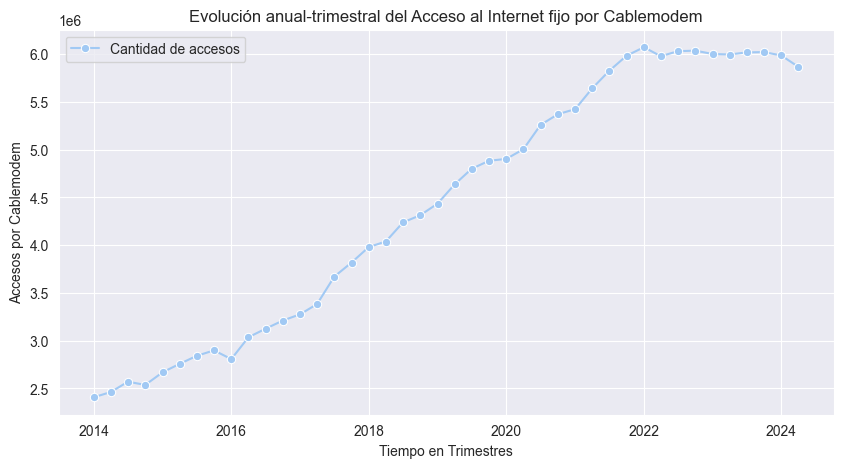

In [588]:
# Cambiar el tamaño del gráfico
plt.figure(figsize = (10, 5))

# Graficar la evolución del Acceso al Internet fijo por Cablemodem
sns.lineplot(x = 'Fecha', y = 'Cablemodem', data = total_acceso_tecnologia, label='Cantidad de accesos', marker='o')
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por Cablemodem")
plt.title("Evolución anual-trimestral del Acceso al Internet fijo por Cablemodem")
# Mostrar gráfico completo
plt.show()

### Evolución en el tiempo Fibra optica

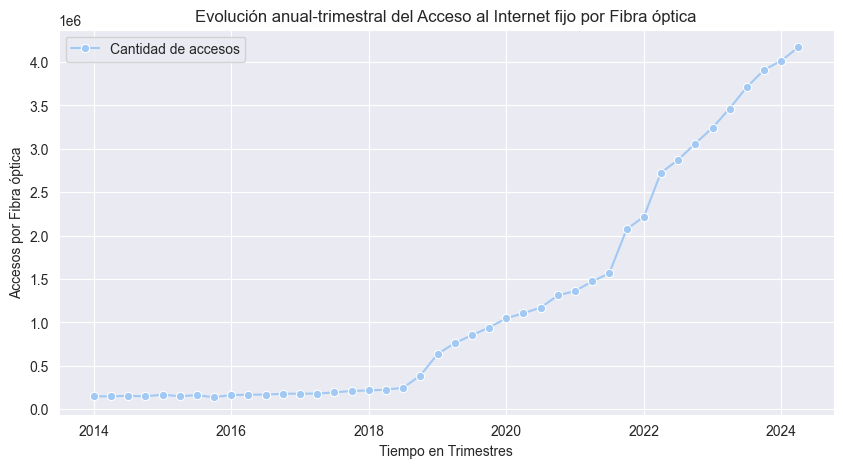

In [589]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Graficar la evolución del Acceso al Internet fijo por Fibra óptica
sns.lineplot(x='Fecha', y='Fibra óptica', data = total_acceso_tecnologia, label='Cantidad de accesos', marker='o')
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por Fibra óptica")
plt.title("Evolución anual-trimestral del Acceso al Internet fijo por Fibra óptica")
# Mostrar gráfico completo
plt.show()

### Evolución en el tiempo Wireless

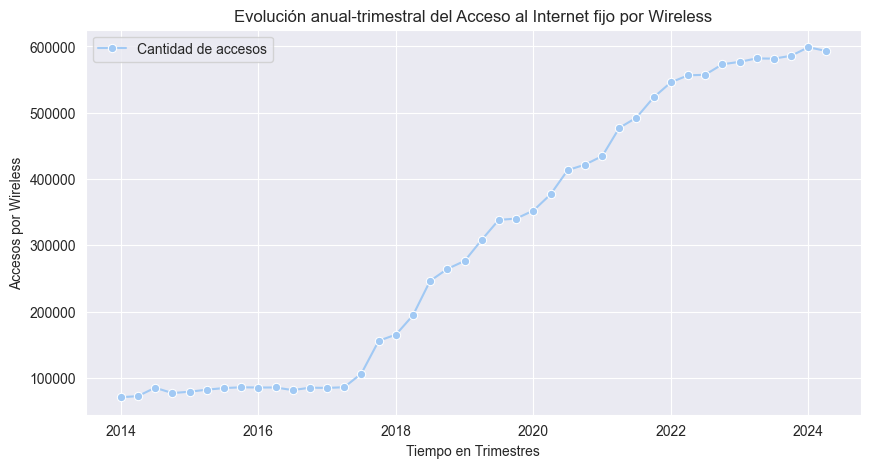

In [590]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Graficar la evolución del Acceso al Internet fijo por Wireless
sns.lineplot(x='Fecha', y='Wireless', data = total_acceso_tecnologia, label='Cantidad de accesos', marker='o')
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por Wireless")
plt.title("Evolución anual-trimestral del Acceso al Internet fijo por Wireless")
# Mostrar gráfico completo
plt.show()

### Evolución en el tiempo Otros

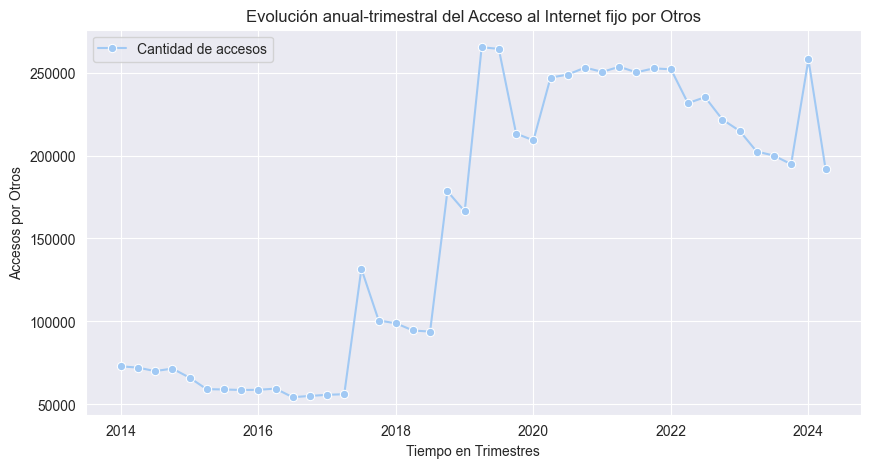

In [591]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Graficar la evolución del Acceso al Internet fijo por Otros
sns.lineplot(x = 'Fecha', y = 'Otros', data = total_acceso_tecnologia, label = 'Cantidad de accesos', marker = 'o')
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por Otros")
plt.title("Evolución anual-trimestral del Acceso al Internet fijo por Otros")
# Mostrar gráfico completo
plt.show()

In [592]:
total_acceso_tecnologia.to_csv('acceso_total_tecnologia.csv', sep = ',', index = False)